In [55]:
import json
import sys
import music21
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from music21 import *

from collections import Counter

In [2]:
with open('./Data/data.json') as f:
    data = json.load(f)

df = pd.json_normalize(data)

## Nombre de partitions par time_signature

In [49]:
count_by_key = df[df['time_signature'].notnull()]['time_signature'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

print(count_by_key)

2/4    162
3/4      5
4/4      4
Name: time_signature, dtype: int64


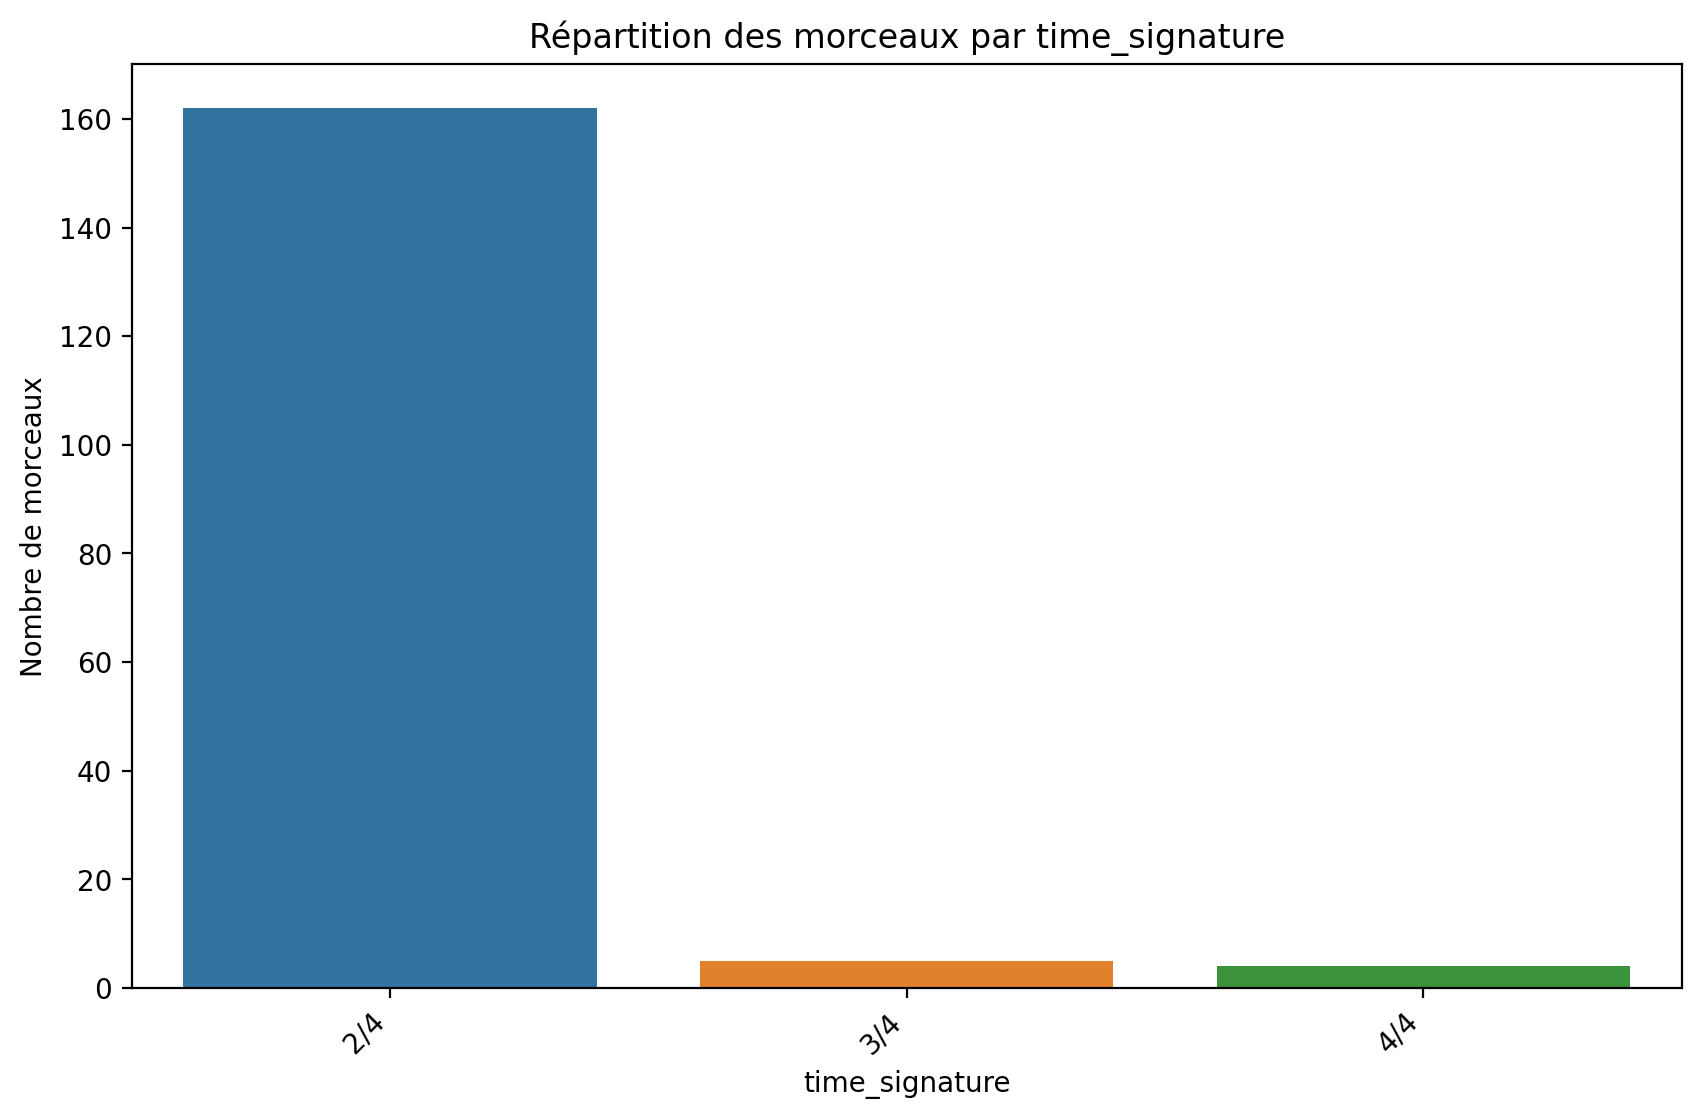

In [50]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='time_signature', data=df[df['time_signature'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par time_signature')
plt.xlabel('time_signature')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

## Nombre de morceaux par clé

## Par partie 

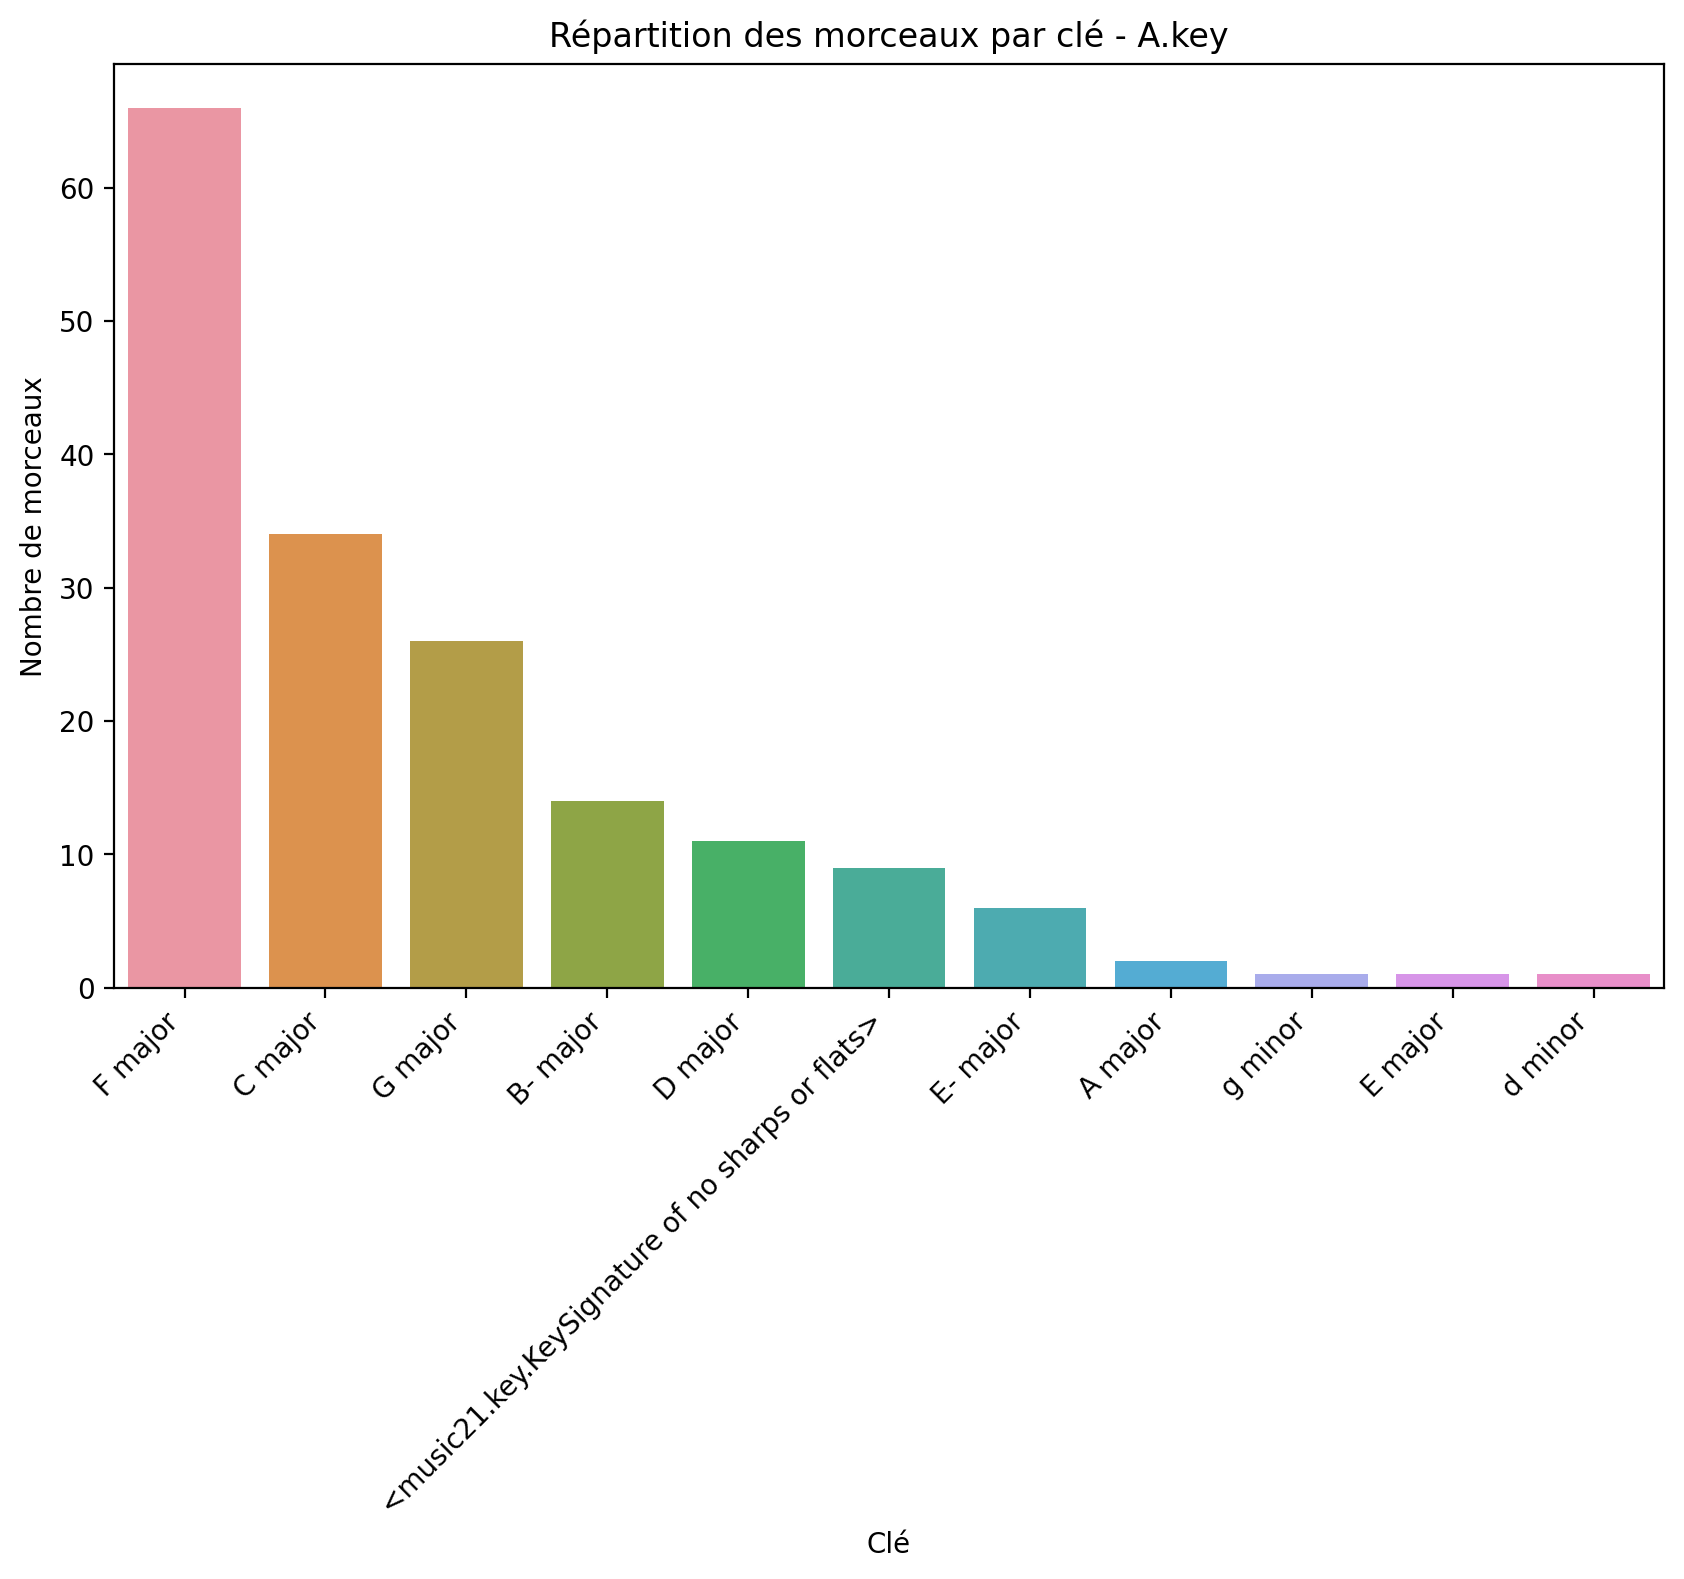

In [4]:
# Compter le nombre de morceaux par clé

count_by_key = df[df['A.key'].notnull()]['A.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='A.key', data=df[df['A.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie A')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

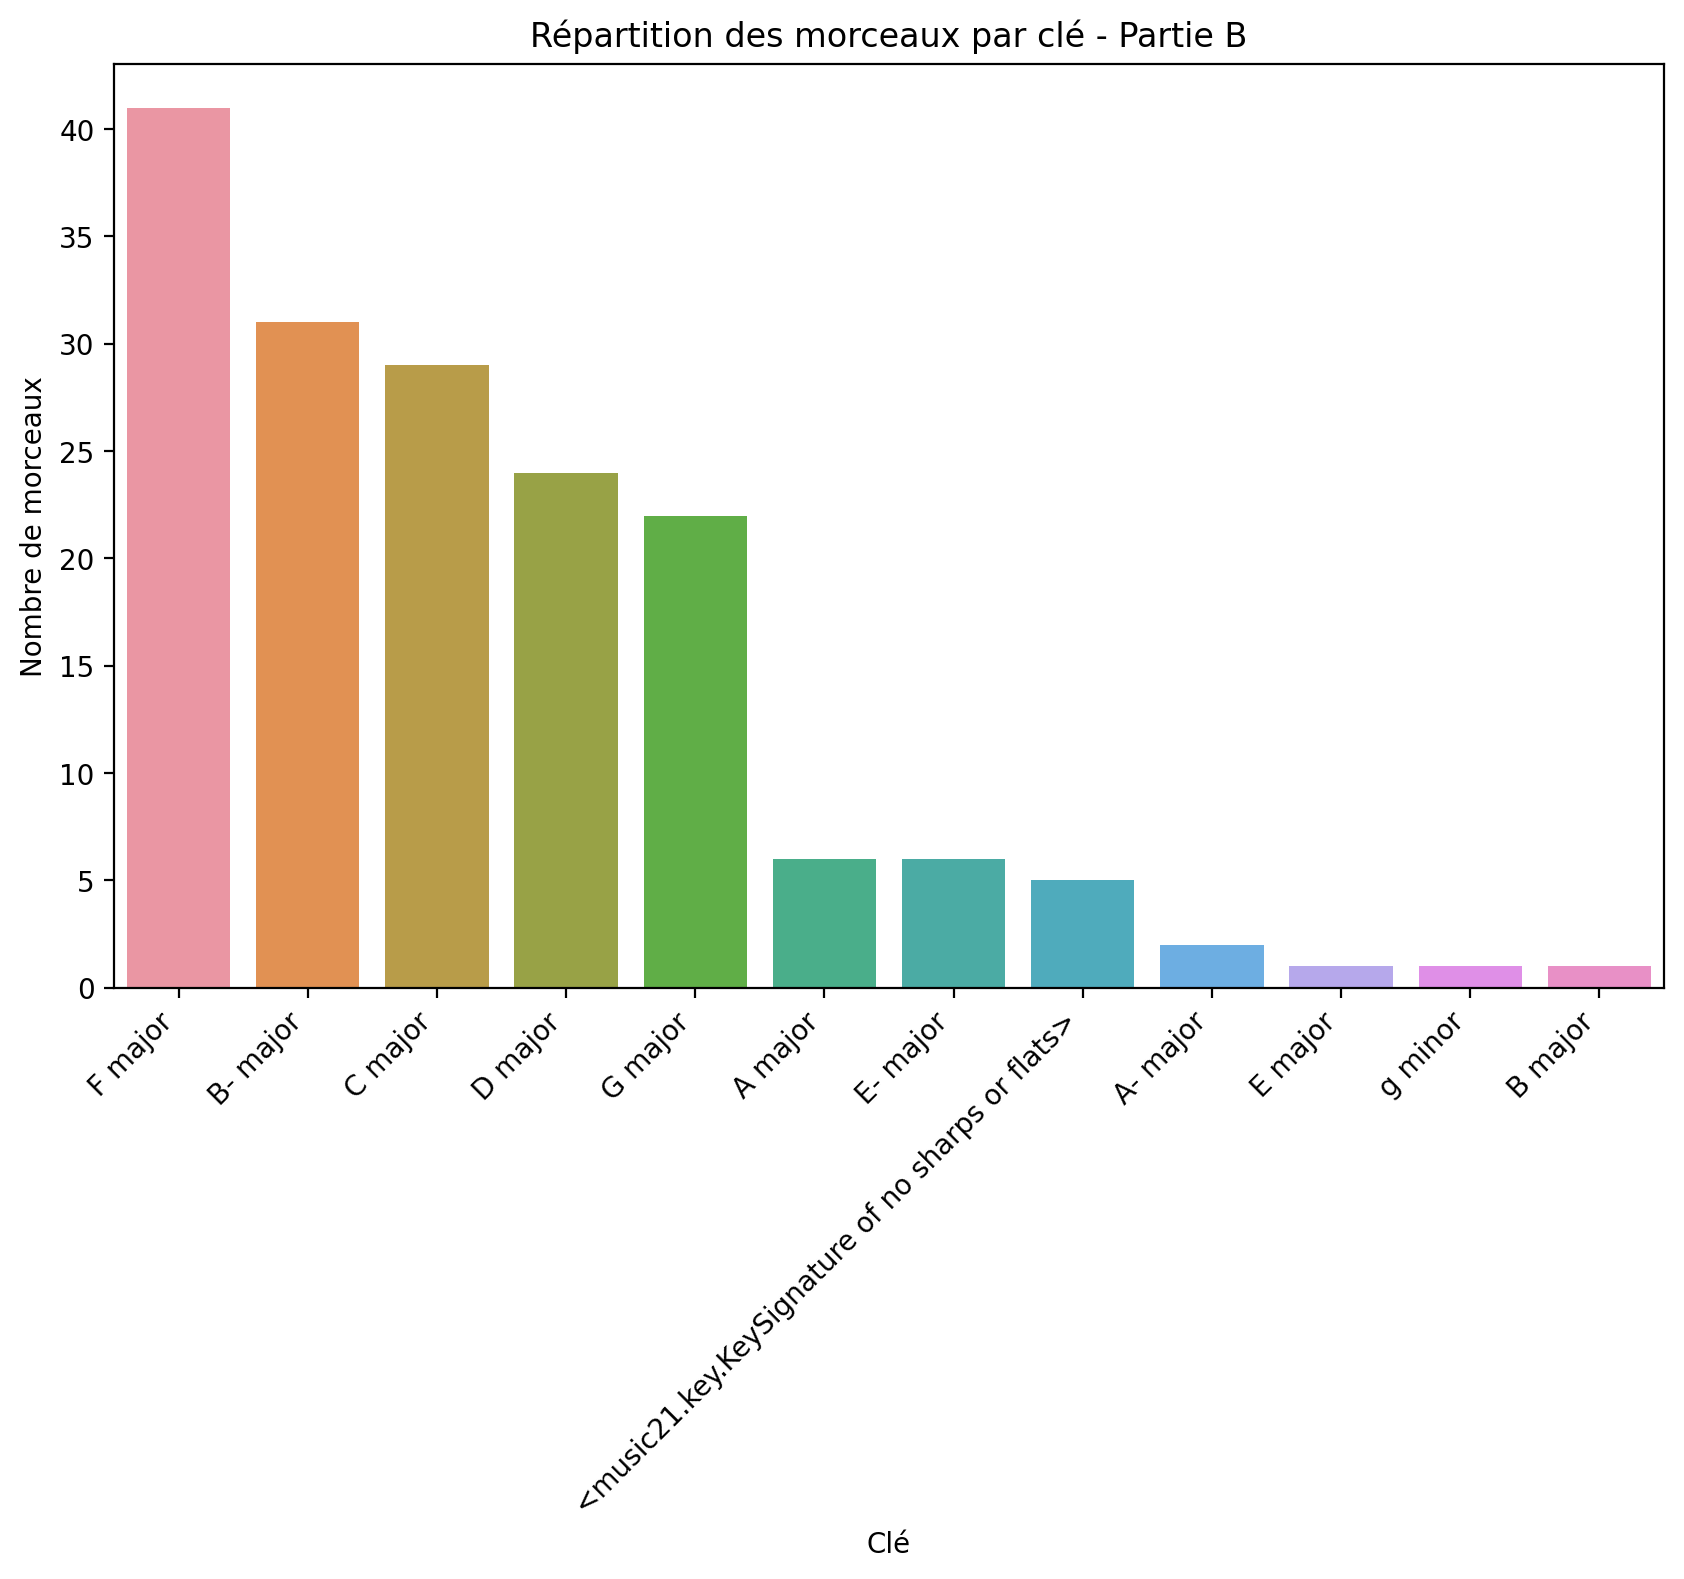

In [51]:
count_by_key = df[df['B.key'].notnull()]['B.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='B.key', data=df[df['B.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie B')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

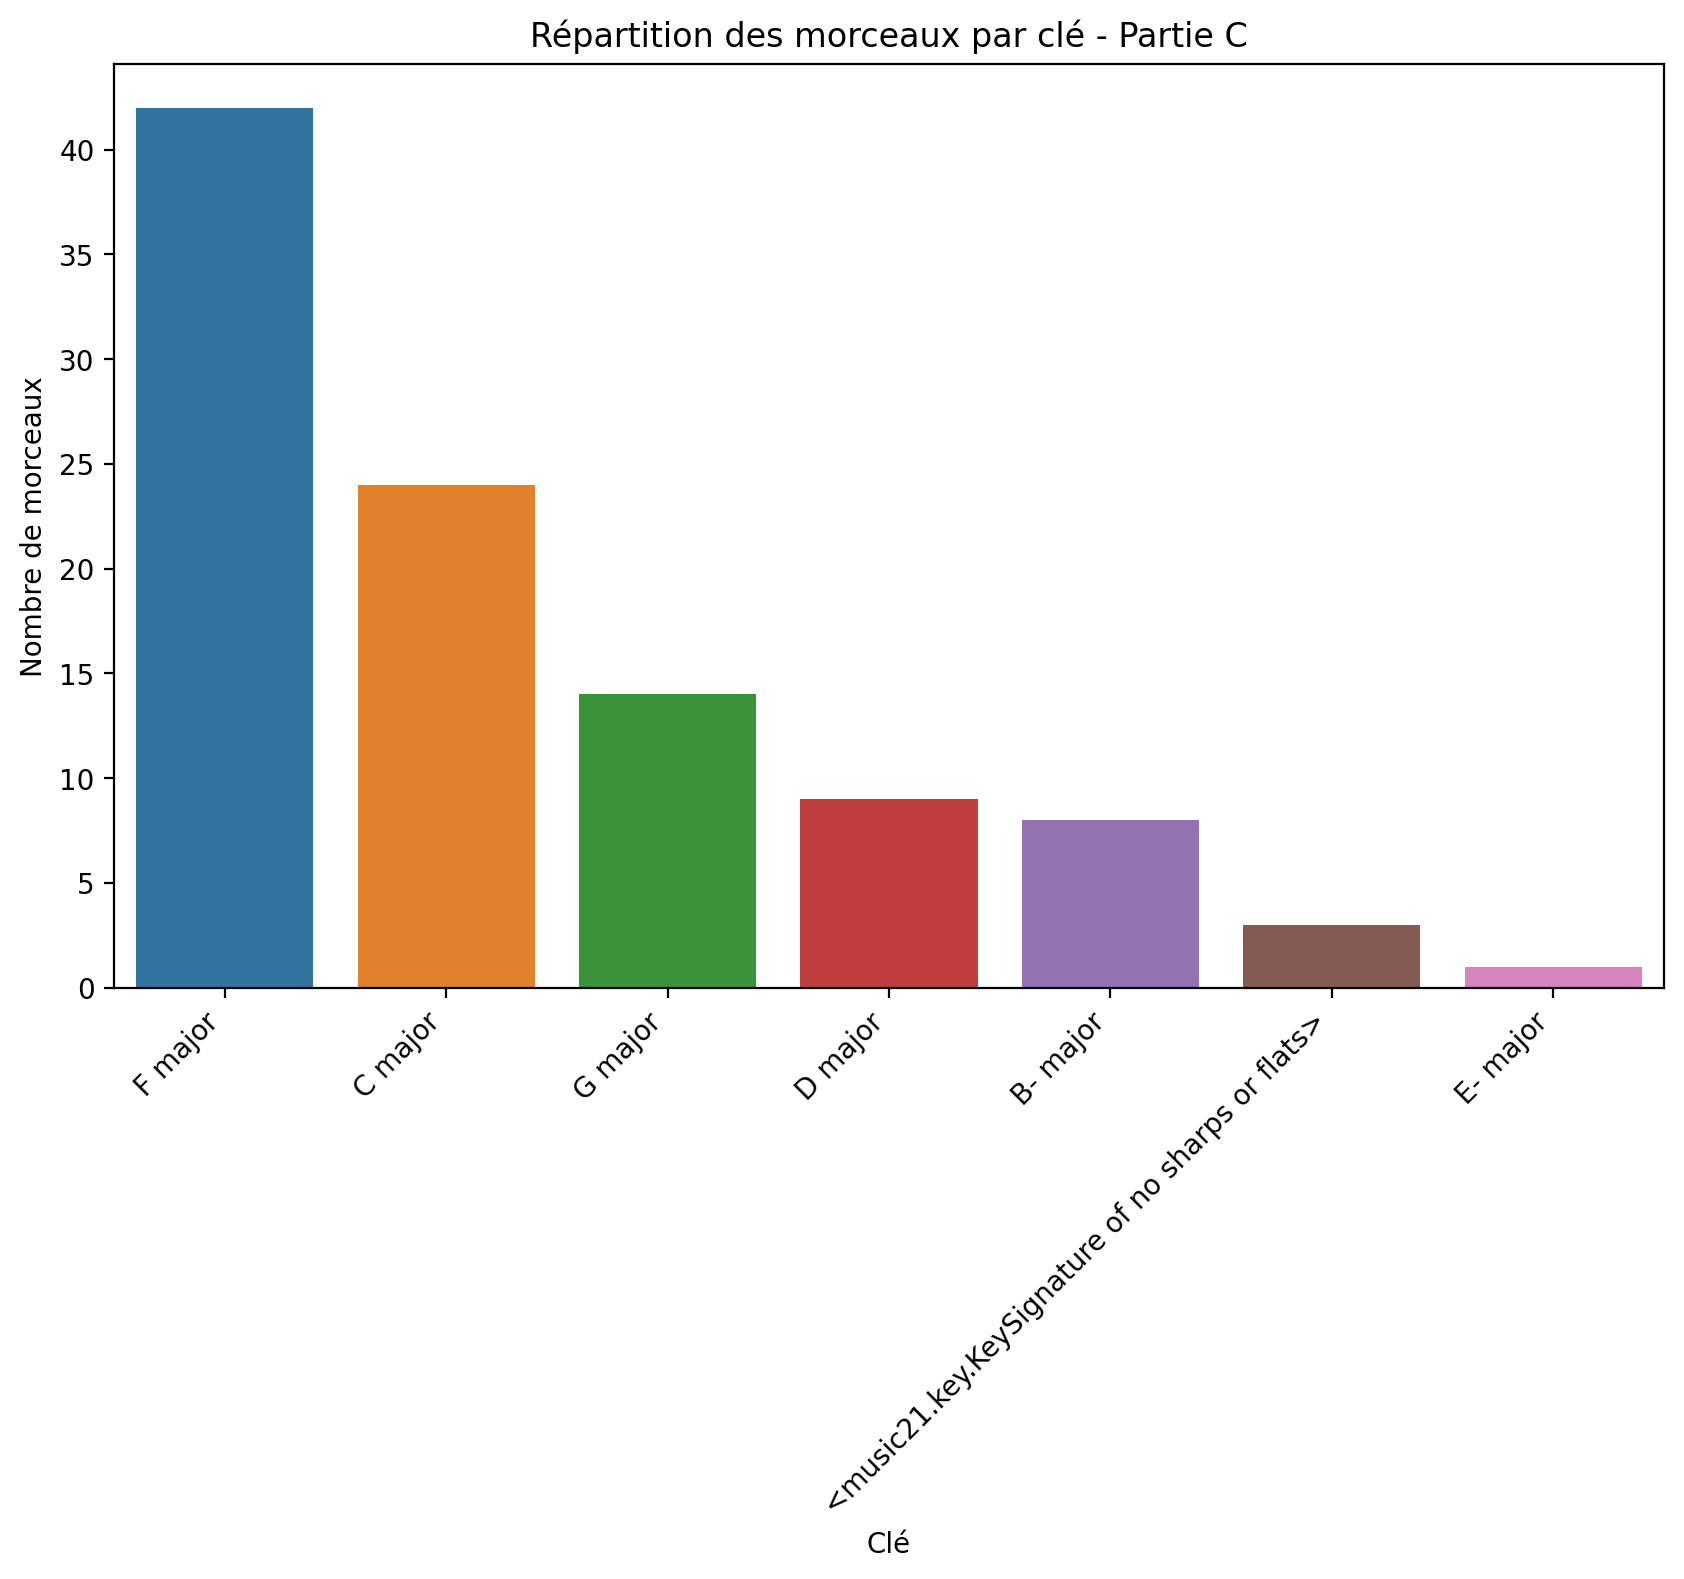

In [52]:
count_by_key = df[df['C.key'].notnull()]['C.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='C.key', data=df[df['C.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie C')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

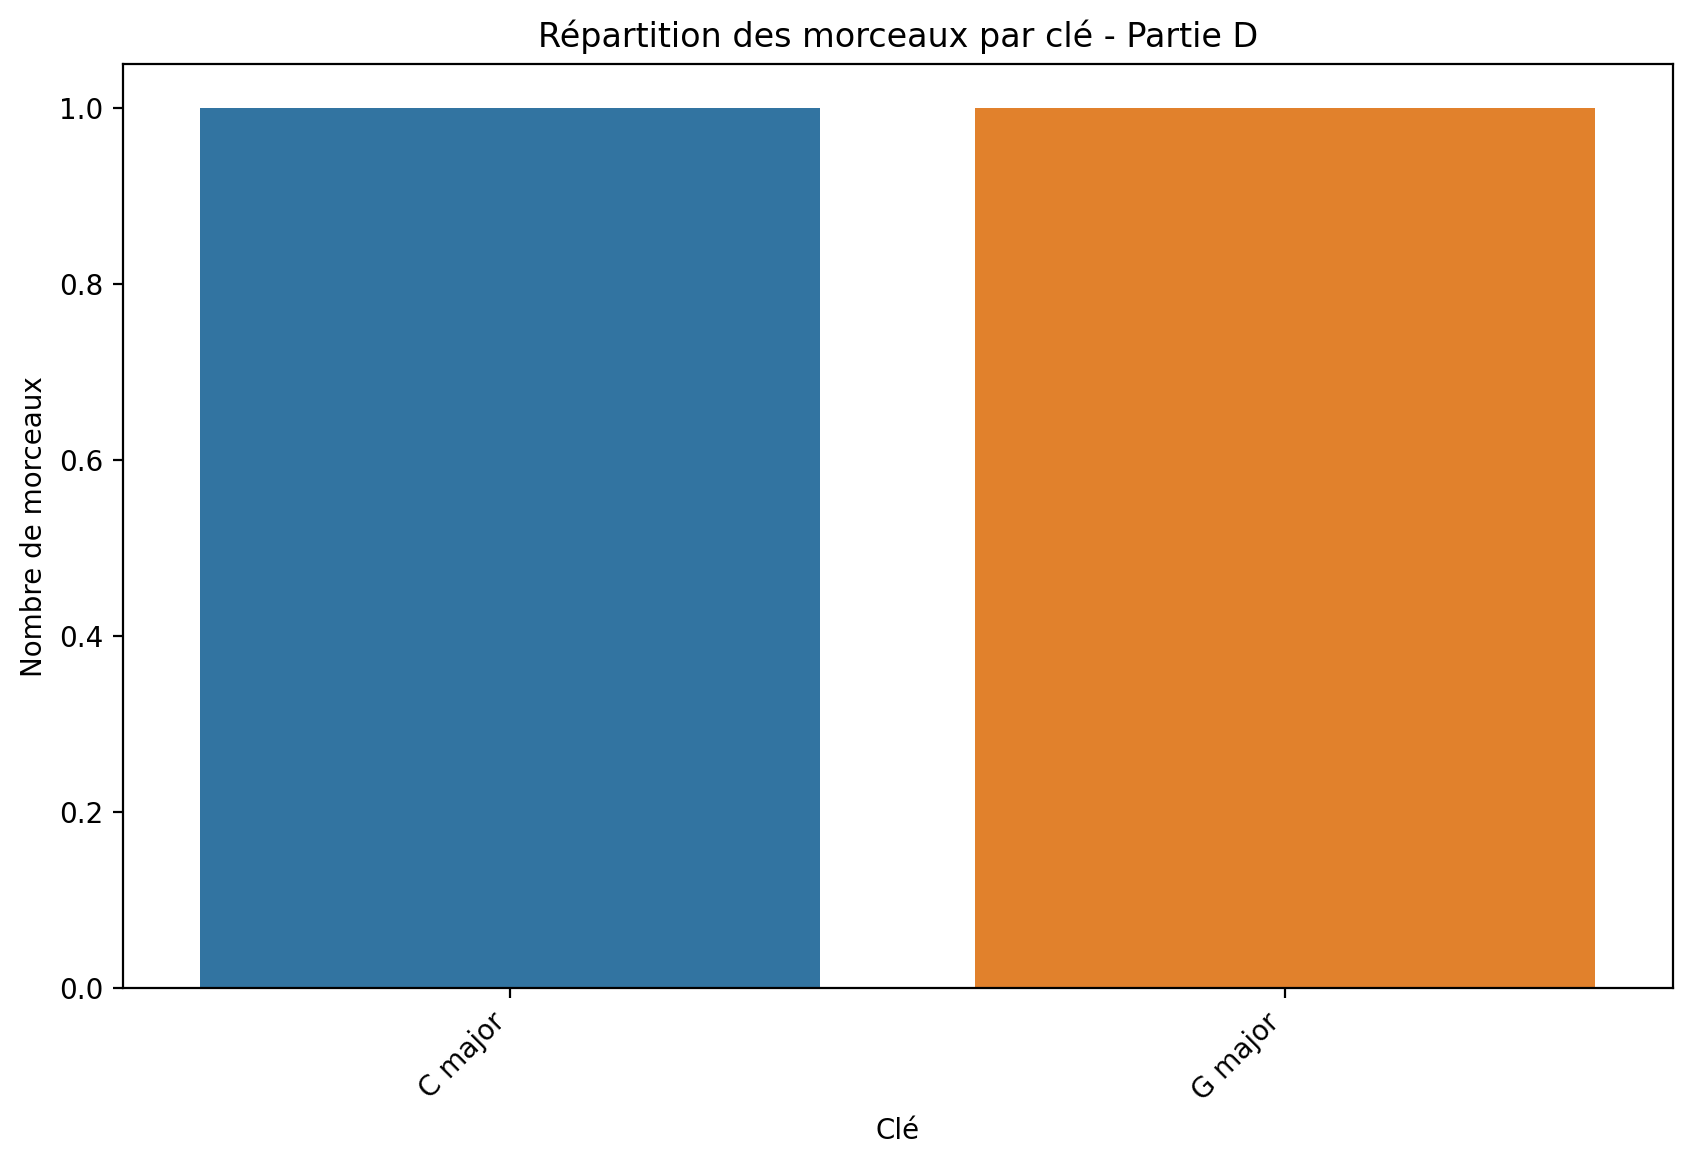

In [53]:
count_by_key = df[df['D.key'].notnull()]['D.key'].value_counts()
sorted_keys = count_by_key.sort_values(ascending=False).index

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='D.key', data=df[df['D.key'].notnull()], order=sorted_keys)
plt.title('Répartition des morceaux par clé - Partie D')
plt.xlabel('Clé')
plt.ylabel('Nombre de morceaux')

# Incliner les étiquettes de l'axe des x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

## Vérification des longueurs des parties extraites

In [8]:
df

,title,time_signature,A.key,A.1.Notes,A.1.Accords,A.2.Notes,A.2.Accords,A.3.Notes,A.3.Accords,A.4.Notes,...,B.66.Notes,B.66.Accords,C.33.Notes,C.33.Accords,C.34.Notes,C.34.Accords,C.35.Notes,C.35.Accords,C.36.Notes,C.36.Accords
0,A Ginga do Mané,2/4,F major,"[[E6, 16th], [G5, 16th], [G#5, 16th], [A5, 16t...",[],"[[E6, 16th], [D6, 16th], [F5, 16th], [G5, 16th...",[],"[[B-5, 16th], [D5, 16th], [D#5, 16th], [E5, 16...",[],"[[A5, 16th], [F5, 16th], [D5, 16th], [B4, 16th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A Vida é um Buraco,2/4,C major,"[[E5, 16th], [D5, 16th], [C5, 16th], [B4, 16th]]",[],"[[A4, 16th], [B4, 16th], [C5, 16th], [C#5, 16t...","[[Dm7, 1.0], [G7, 1.0]]","[[G4, eighth], [E4, 16th], [A4, 16th], [A4, 16...","[[C, 1.75]]","[[A4, eighth], [F4, 16th], [B4, 16th], [B4, 16...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ACARICIANDO,2/4,F major,"[[A4, 16th], [C5, eighth], [D5, 16th], [D5, 16...",[],"[[G#4, quarter], [G#4, 16th], [D5, eighth], [D...",[],"[[D5, 16th], [A4, eighth], [A4, 16th], [A4, qu...",[],"[[A4, quarter]]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ACERTA O PASSO,4/4,C major,"[[E4, 16th], [G4, 16th], [C5, 16th], [F#4, 16t...","[[C, 1.0], [E-dim, 0.5]]","[[B4, 16th], [A4, eighth], [B4, 16th], [G4, ei...","[[Dm7, 1.0], [G7, 1.0]]","[[E4, 16th], [G4, 16th], [C5, 16th], [F#4, 16t...","[[C, 0.75], [E-dim, 0.75]]","[[B4, 16th], [A4, eighth], [B4, 16th], [G4, ei...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aeroporto do Galeao,2/4,F major,"[[G4, eighth], [A4, 16th], [C5, 16th], [F4, 16...","[[F6 add 9, 2.0]]","[[F4, 16th], [G4, 16th], [A4, 16th], [G4, 16th...","[[F6 add 9, 1.75]]","[[C5, 16th], [C5, 16th], [C5, 16th], [C5, 16th...","[[F, 1.0], [F#power, 1.0]]","[[D5, 16th], [D5, 16th], [D5, 16th], [E-5, 16t...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Viva João da Baiana,2/4,B- major,"[[D5, 16th], [B-4, 16th], [G4, 16th], [D5, 16t...","[[Gm, 1.5]]","[[C5, 16th], [A4, 16th], [F#4, 16th], [D5, qua...","[[D7, 1.75]]","[[D5, 16th], [B-4, 16th], [G4, 16th], [D5, 16t...","[[Gm, 1.5]]","[[C5, 16th], [A4, 16th], [F#4, 16th], [D5, qua...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,Vou Vivendo,2/4,F major,[],"[[F#dim, 2.25]]","[[A4, 16th], [G4, eighth], [F#4, 16th], [G4, e...",[],"[[F4, quarter], [F4, 16th], [A4, eighth], [G4,...",[],"[[F4, 16th], [E4, eighth], [D#4, 16th], [E4, e...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,VÊ SE GOSTAS,2/4,G major,"[[E4, half]]","[[G6, 2.0]]","[[D4, 16th], [E4, 16th], [D4, 16th], [F4, 16th...",[],"[[E4, 16th], [E4, 16th], [D4, 16th], [E4, 16th...","[[G6, 2.0]]","[[D4, 16th], [E4, 16th], [D4, 16th], [F4, 16th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,É DO PANGARÉ,2/4,F major,"[[D4, 16th], [E4, 16th], [F4, 16th], [G4, 16th...","[[Dm, 0.5]]","[[G4, 16th], [A4, 16th], [B-4, 16th], [C5, 16t...","[[Gm, 2.0]]","[[A4, 16th], [B4, 16th], [C#5, 16th], [D5, 16t...","[[A7, 2.0]]","[[G5, 16th], [F5, 16th], [A5, 16th], [D5, 16th...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
def count_subparts(song, part):
    subparts = [subpart for subpart in song[part].keys() if subpart != 'key']
    return len(subparts)


counts_dict = {'titre': [song['title'] for song in data]}
for part in ['A', 'B', 'C', 'D']:  
    counts_dict[f'cpt_part_{part}'] = [count_subparts(song, part) if part in song else 0 for song in data]


df_counts = pd.DataFrame(counts_dict)

print(df_counts)


                   titre  cpt_part_A  cpt_part_B  cpt_part_C  cpt_part_D
0        A Ginga do Mané          16          16          16           0
1     A Vida é um Buraco          16          16          16           0
2            ACARICIANDO          24          16           0           0
3         ACERTA O PASSO          16          16          16           0
4    Aeroporto do Galeao          16          16           0           0
..                   ...         ...         ...         ...         ...
166  Viva João da Baiana          16          16           8           0
167          Vou Vivendo          16          16          16           0
168         VÊ SE GOSTAS          32          16           0           0
169         É DO PANGARÉ          16          17          16           0
170          É DO QUE HÁ          32          18          16           0

[171 rows x 5 columns]


## Notes

### Sur une mesure en particulier

In [58]:
def count_notes(note_list):
    return dict(Counter(note[0] for note in note_list))

df['Note_Count_A'] = df['A.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})
df['Note_Count_B'] = df['B.1.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

note_counts_A = pd.DataFrame(df['Note_Count_A'].tolist()).fillna(0)
note_counts_B = pd.DataFrame(df['Note_Count_B'].tolist()).fillna(0)

note_counts_A_sum = note_counts_A.sum()
note_counts_B_sum = note_counts_B.sum()



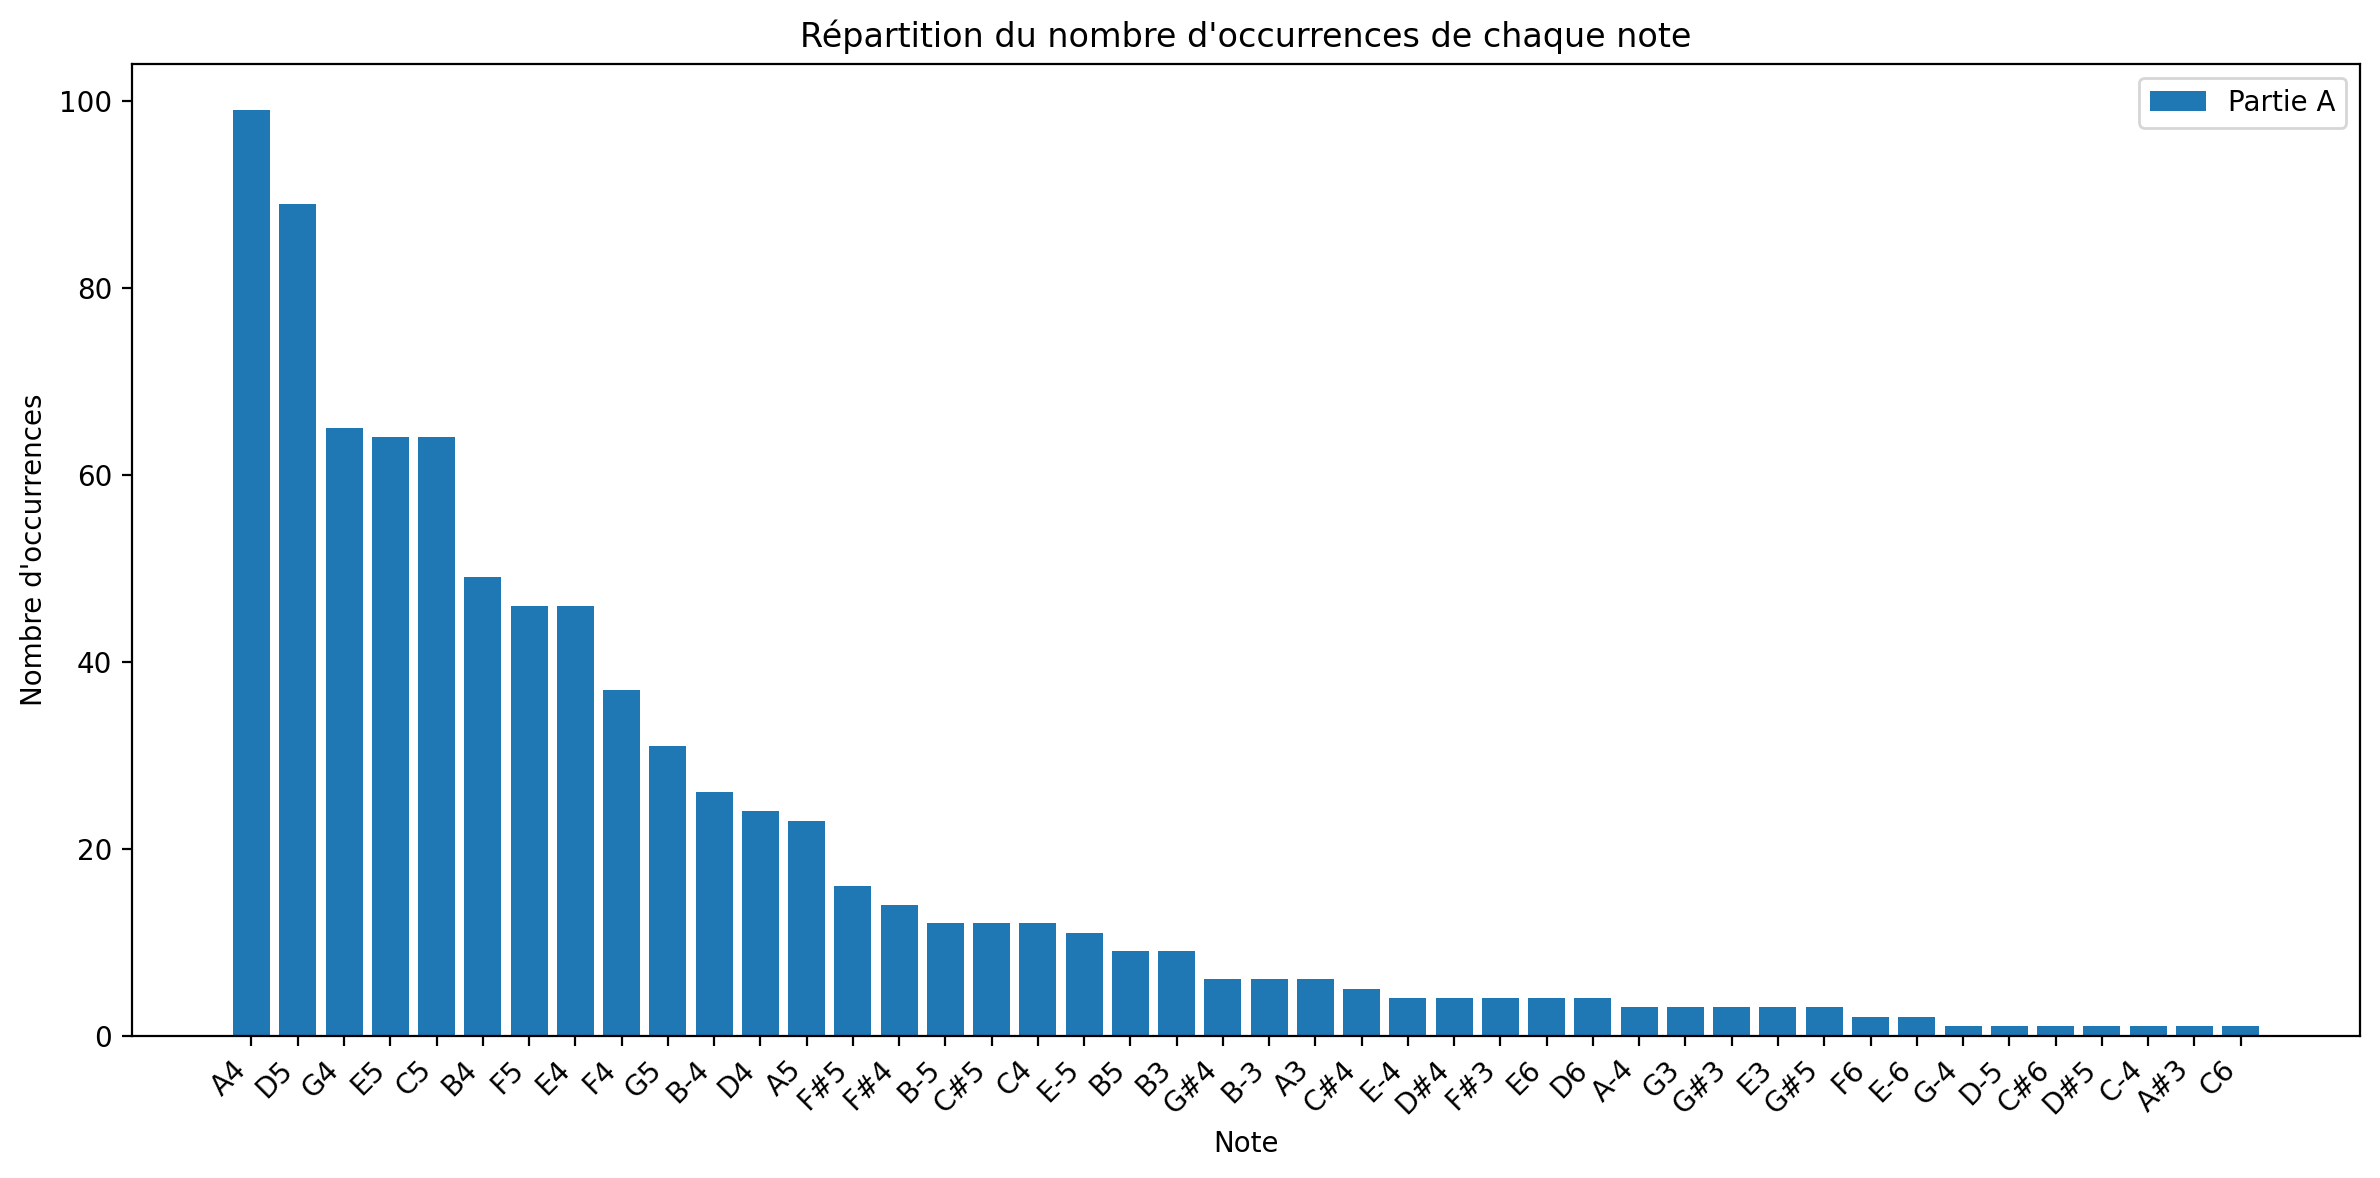

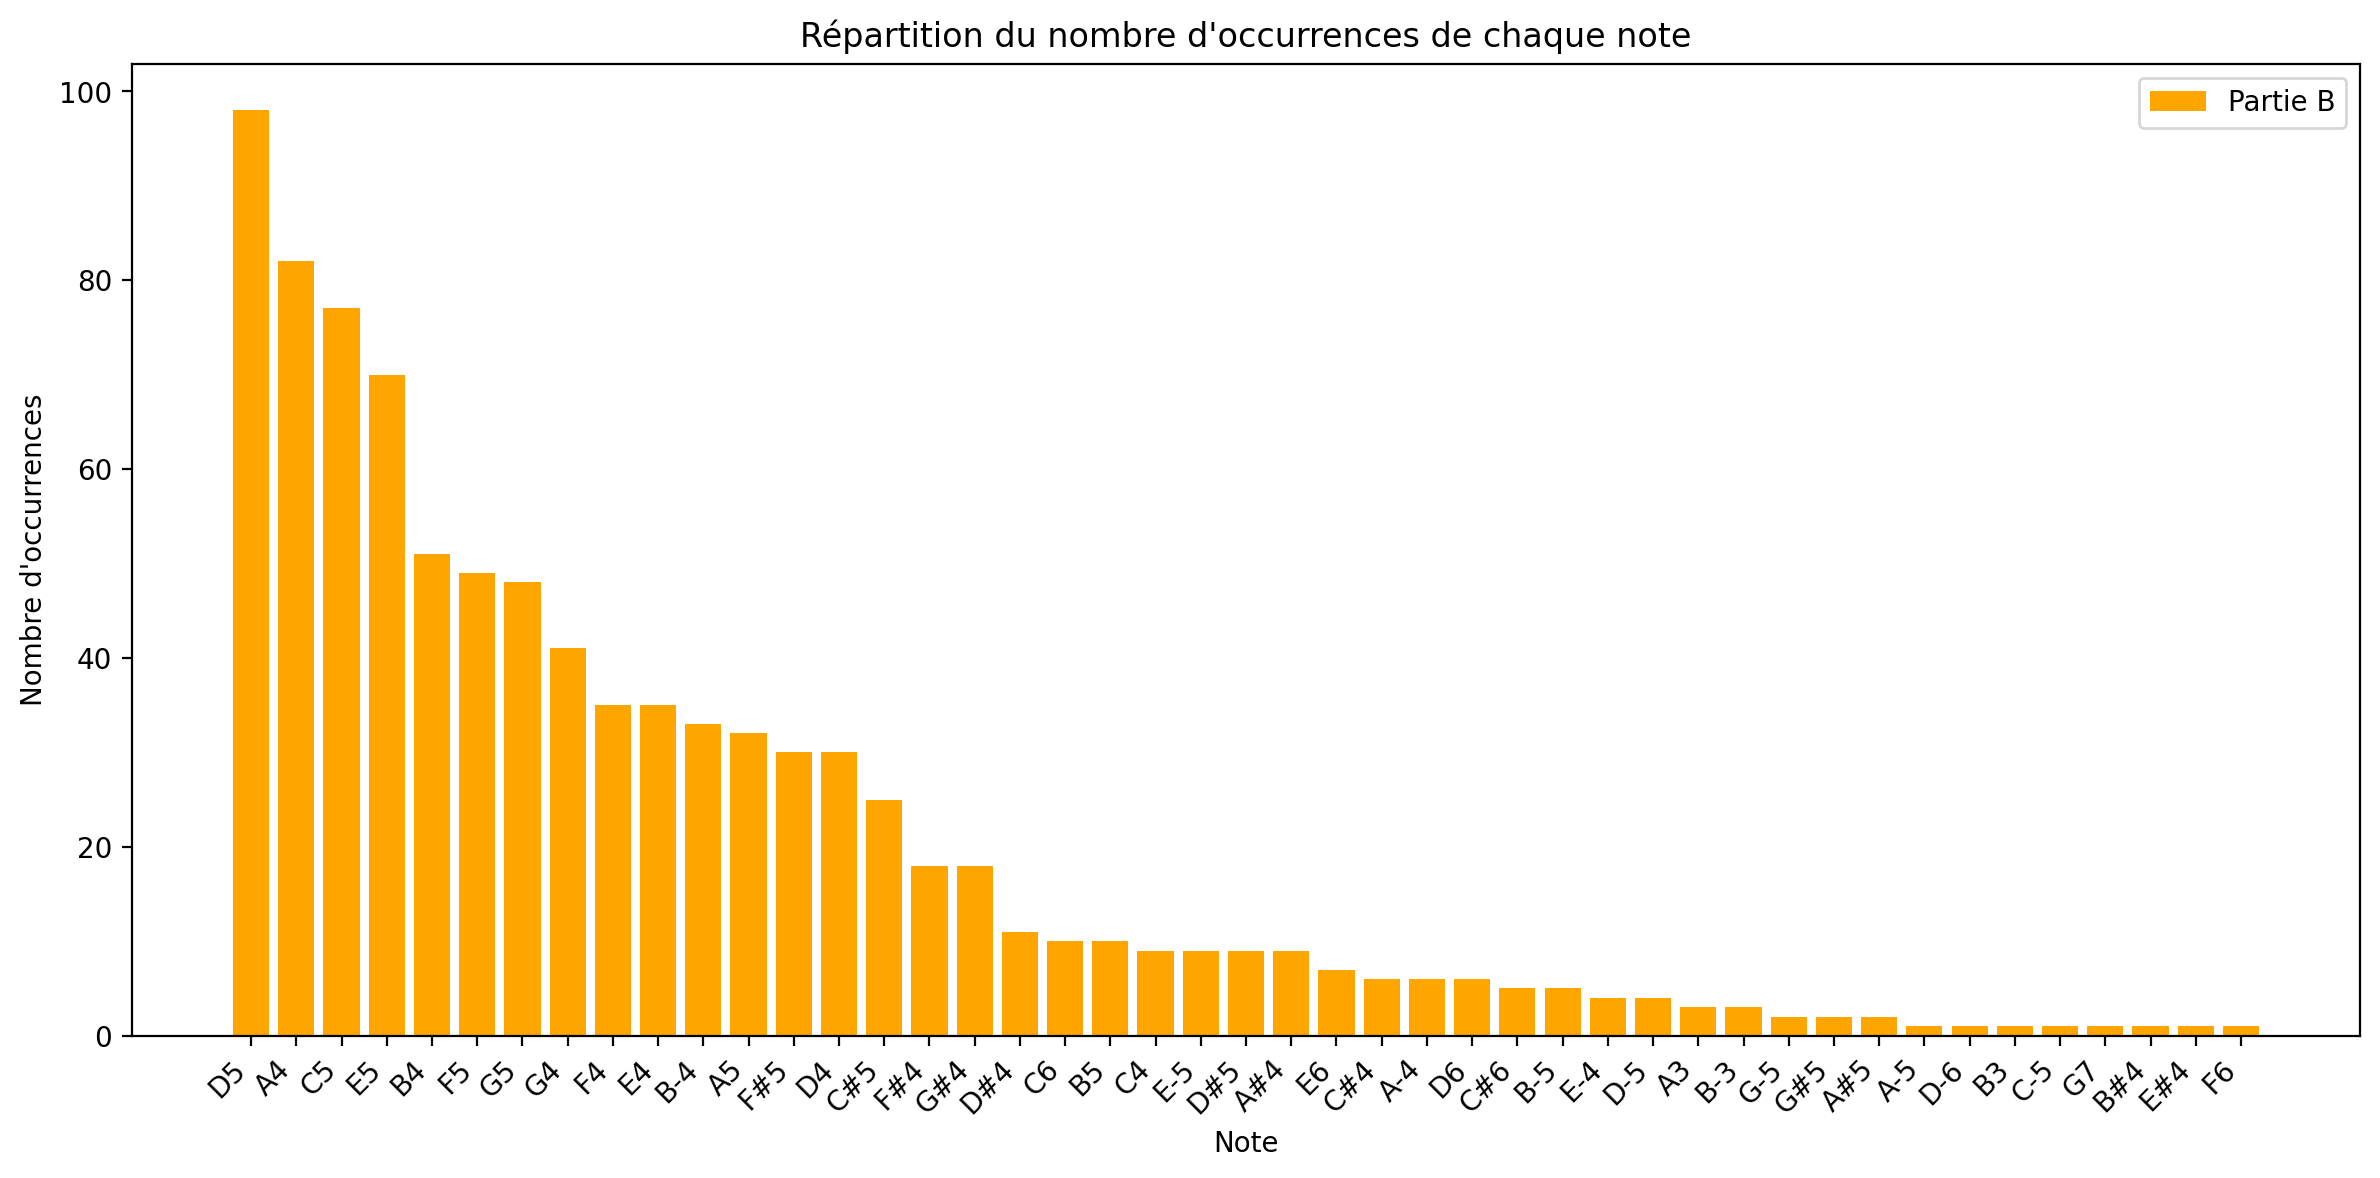

In [59]:
note_counts_A_sum = note_counts_A_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(note_counts_A_sum.index, note_counts_A_sum.values, label='Partie A')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

note_counts_B_sum = note_counts_B_sum.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(note_counts_B_sum.index, note_counts_B_sum.values, label='Partie B', color='orange')
plt.xlabel('Note')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque note')
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


In [60]:
df_A_sorted = pd.DataFrame({'Note': note_counts_A_sum.index, 'Occurrences': note_counts_A_sum.values})

print("Partie A - Répartition du nombre d'occurrences de chaque note")
print(df_A_sorted)


Partie A - Répartition du nombre d'occurrences de chaque note
   Note  Occurrences
0    A4         99.0
1    D5         89.0
2    G4         65.0
3    E5         64.0
4    C5         64.0
5    B4         49.0
6    F5         46.0
7    E4         46.0
8    F4         37.0
9    G5         31.0
10  B-4         26.0
11   D4         24.0
12   A5         23.0
13  F#5         16.0
14  F#4         14.0
15  B-5         12.0
16  C#5         12.0
17   C4         12.0
18  E-5         11.0
19   B5          9.0
20   B3          9.0
21  G#4          6.0
22  B-3          6.0
23   A3          6.0
24  C#4          5.0
25  E-4          4.0
26  D#4          4.0
27  F#3          4.0
28   E6          4.0
29   D6          4.0
30  A-4          3.0
31   G3          3.0
32  G#3          3.0
33   E3          3.0
34  G#5          3.0
35   F6          2.0
36  E-6          2.0
37  G-4          1.0
38  D-5          1.0
39  C#6          1.0
40  D#5          1.0
41  C-4          1.0
42  A#3          1.0
43   C6       

In [61]:
df_B_sorted = pd.DataFrame({'Note': note_counts_B_sum.index, 'Occurrences': note_counts_B_sum.values})

print("\nPartie B - Répartition du nombre d'occurrences de chaque note - Mesure 1")
print(df_B_sorted)


Partie B - Répartition du nombre d'occurrences de chaque note - Mesure 1
   Note  Occurrences
0    D5         98.0
1    A4         82.0
2    C5         77.0
3    E5         70.0
4    B4         51.0
5    F5         49.0
6    G5         48.0
7    G4         41.0
8    F4         35.0
9    E4         35.0
10  B-4         33.0
11   A5         32.0
12  F#5         30.0
13   D4         30.0
14  C#5         25.0
15  F#4         18.0
16  G#4         18.0
17  D#4         11.0
18   C6         10.0
19   B5         10.0
20   C4          9.0
21  E-5          9.0
22  D#5          9.0
23  A#4          9.0
24   E6          7.0
25  C#4          6.0
26  A-4          6.0
27   D6          6.0
28  C#6          5.0
29  B-5          5.0
30  E-4          4.0
31  D-5          4.0
32   A3          3.0
33  B-3          3.0
34  G-5          2.0
35  G#5          2.0
36  A#5          2.0
37  A-5          1.0
38  D-6          1.0
39   B3          1.0
40  C-5          1.0
41   G7          1.0
42  B#4          1.0
43

In [64]:
note_percentages_A = (note_counts_A_sum / note_counts_A_sum.sum()) * 100
note_percentages_B = (note_counts_B_sum / note_counts_B_sum.sum()) * 100

note_percentages_A = note_percentages_A.sort_values(ascending=False)
note_percentages_B = note_percentages_B.sort_values(ascending=False)



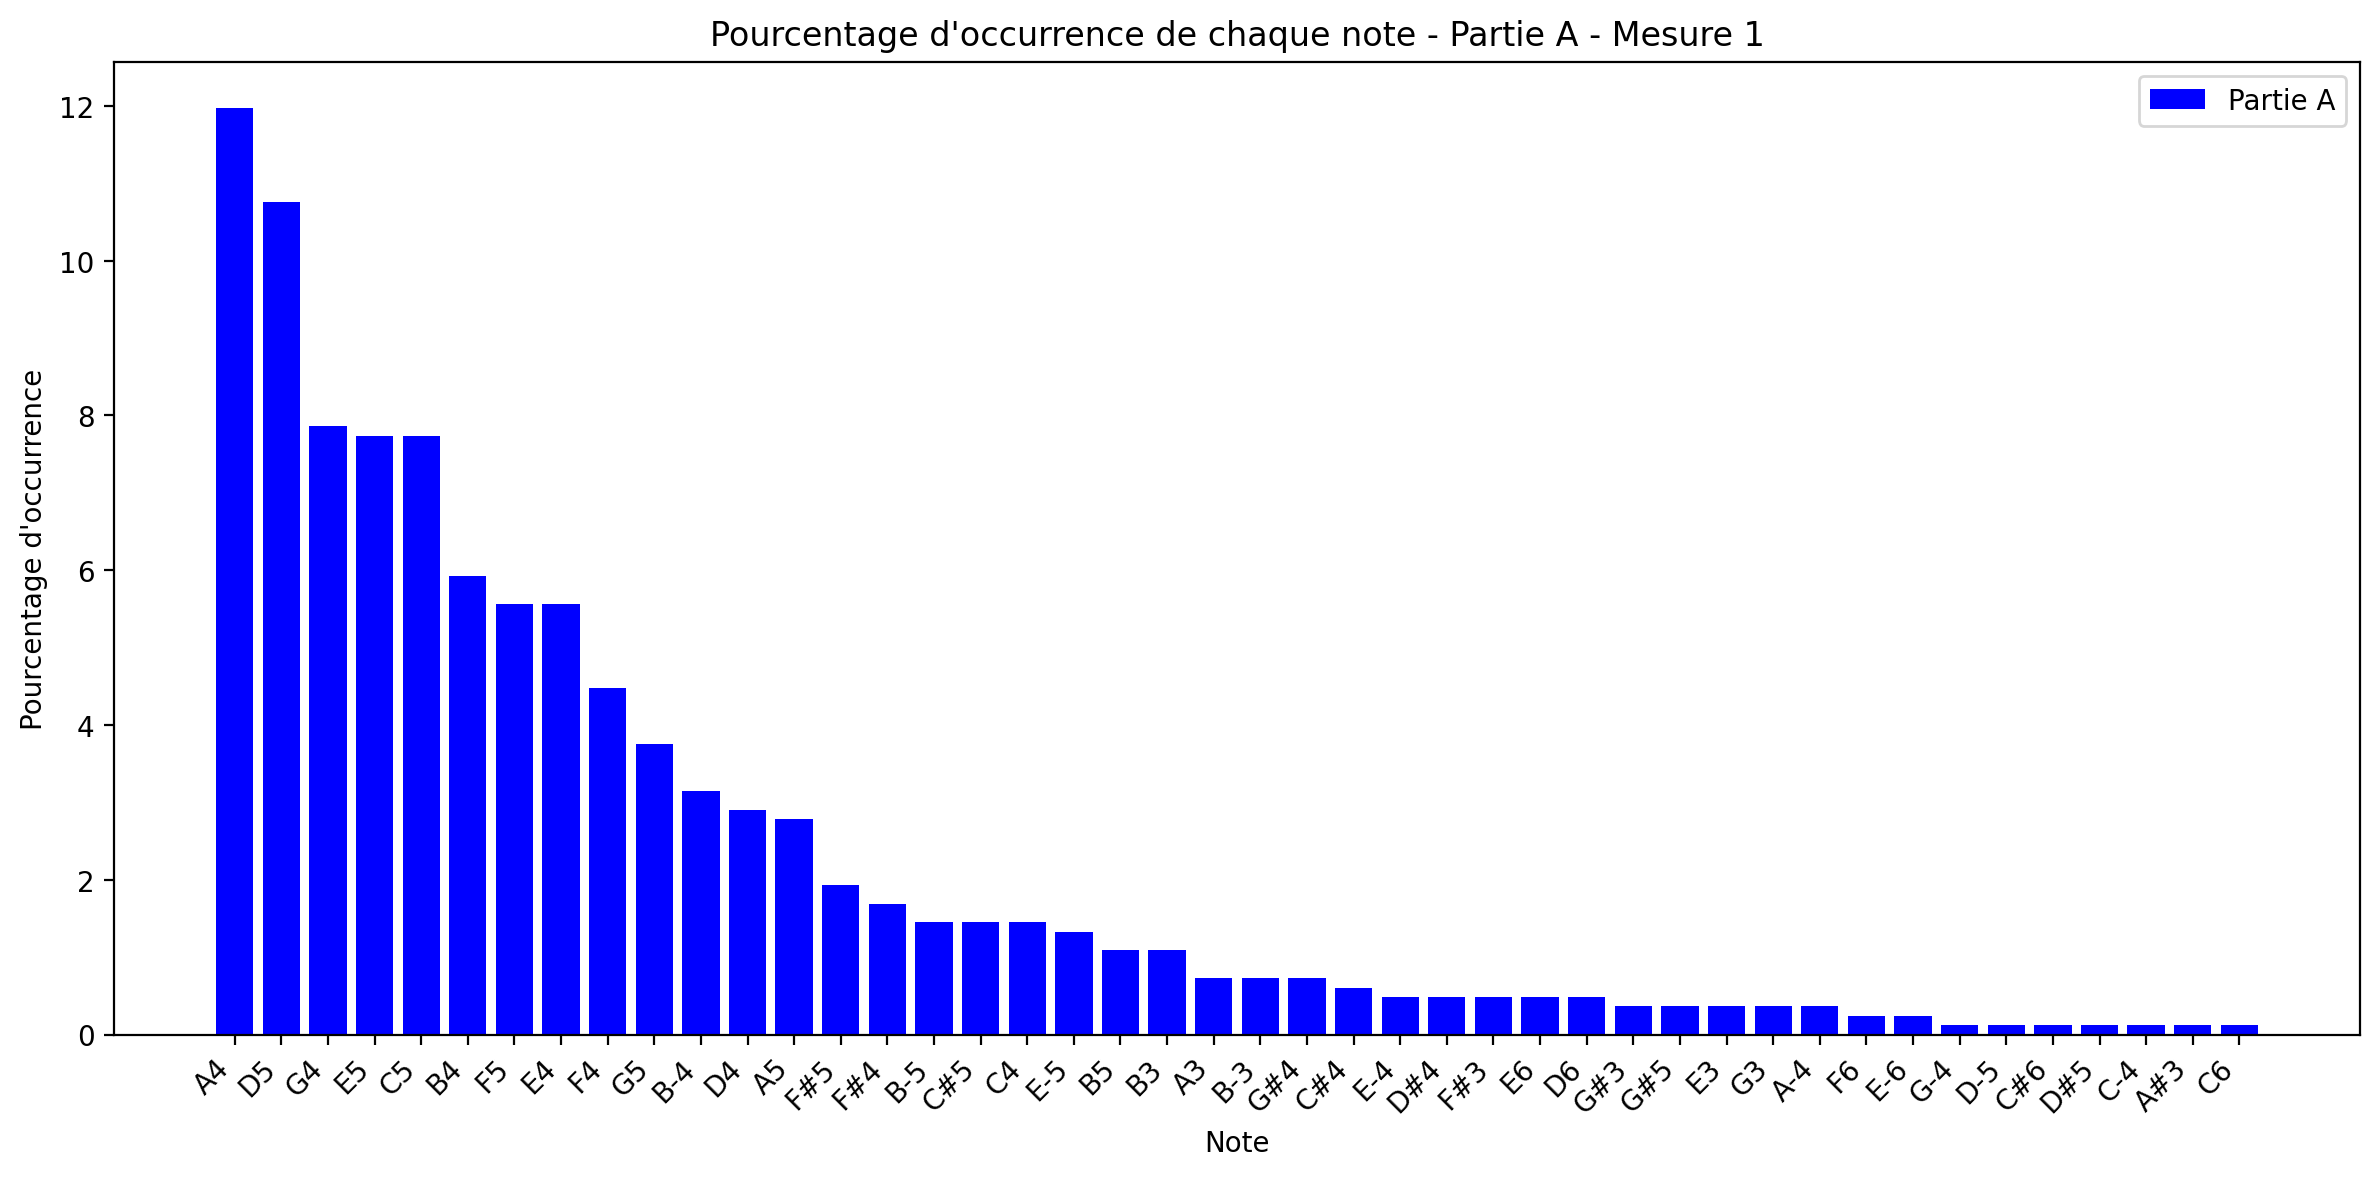

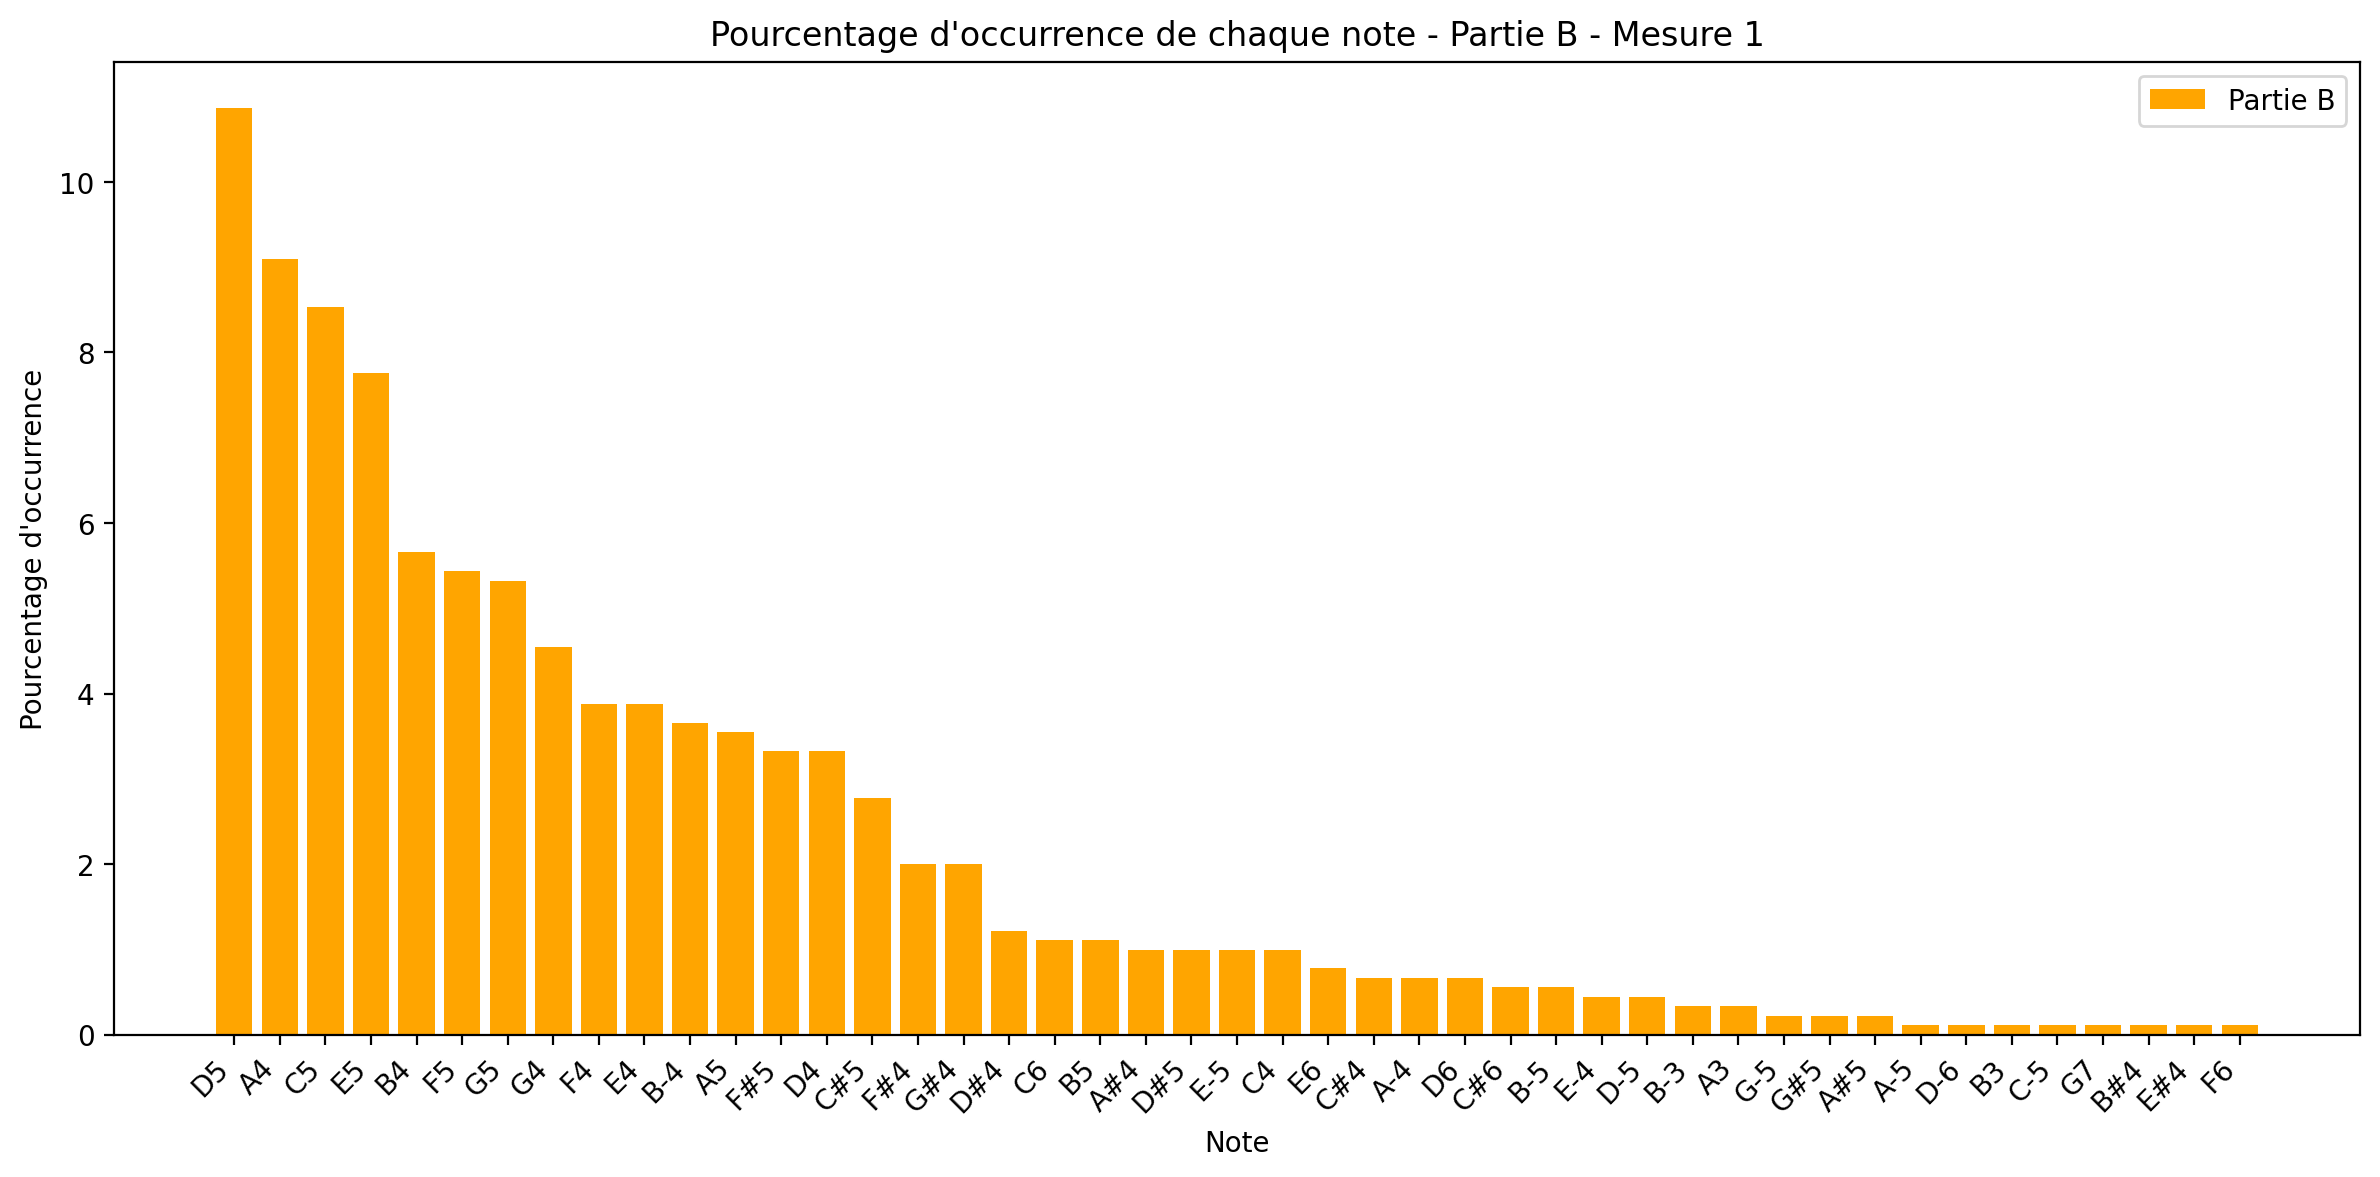

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(note_percentages_A.index, note_percentages_A.values, label='Partie A', color='blue')


plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie A - Mesure 1')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(note_percentages_B.index, note_percentages_B.values, label='Partie B', color='orange')

plt.xlabel('Note')
plt.ylabel('Pourcentage d\'occurrence')
plt.title('Pourcentage d\'occurrence de chaque note - Partie B - Mesure 1')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [67]:
df_A_pn = pd.DataFrame({'Note': note_percentages_A.index, 'Pourcentage d\'occurrence (Partie A) - Mesure 1': note_percentages_A.values})
df_B_pn = pd.DataFrame({'Note': note_percentages_B.index, 'Pourcentage d\'occurrence (Partie B) - Mesure 1': note_percentages_B.values})

print("Partie A:")
print(df_A_pn)

Partie A:
   Note  Pourcentage d'occurrence (Partie A) - Mesure 1
0    A4                                       11.970979
1    D5                                       10.761790
2    G4                                        7.859734
3    E5                                        7.738815
4    C5                                        7.738815
5    B4                                        5.925030
6    F5                                        5.562273
7    E4                                        5.562273
8    F4                                        4.474002
9    G5                                        3.748489
10  B-4                                        3.143894
11   D4                                        2.902056
12   A5                                        2.781137
13  F#5                                        1.934704
14  F#4                                        1.692866
15  B-5                                        1.451028
16  C#5                               

In [68]:
print("\nPartie B - Mesure 1 :")
print(df_B_pn)


Partie B - Mesure 1 :
   Note  Pourcentage d'occurrence (Partie B) - Mesure 1
0    D5                                       10.864745
1    A4                                        9.090909
2    C5                                        8.536585
3    E5                                        7.760532
4    B4                                        5.654102
5    F5                                        5.432373
6    G5                                        5.321508
7    G4                                        4.545455
8    F4                                        3.880266
9    E4                                        3.880266
10  B-4                                        3.658537
11   A5                                        3.547672
12  F#5                                        3.325942
13   D4                                        3.325942
14  C#5                                        2.771619
15  F#4                                        1.995565
16  G#4                  

### Sur une partie en particulier

In [34]:
def count_notes(list_notes):
    return dict(Counter(accord[0] for accord in list_notes))

for part in ['A', 'B']:
    for measure in range(1, 37):  #Prend en compte 36 mesures max par partie
        df[f'Note_Count_{part}_{measure}'] = df[f'{part}.{measure}.Notes'].apply(lambda x: count_notes(x) if isinstance(x, list) else {})

cpt_notes = {}
for part in ['A', 'B']:
    cpt_notes[part] = {}
    for measure in range(1, 37):
        cpt_notes[part][measure] = pd.DataFrame(df[f'Note_Count_{part}_{measure}'].tolist()).fillna(0)

cpt_notes_sum = {}
for part in ['A', 'B']:
    cpt_notes_sum[part] = {}
    for measure in range(1, 37):
        cpt_notes_sum[part][measure] = cpt_notes[part][measure].sum()

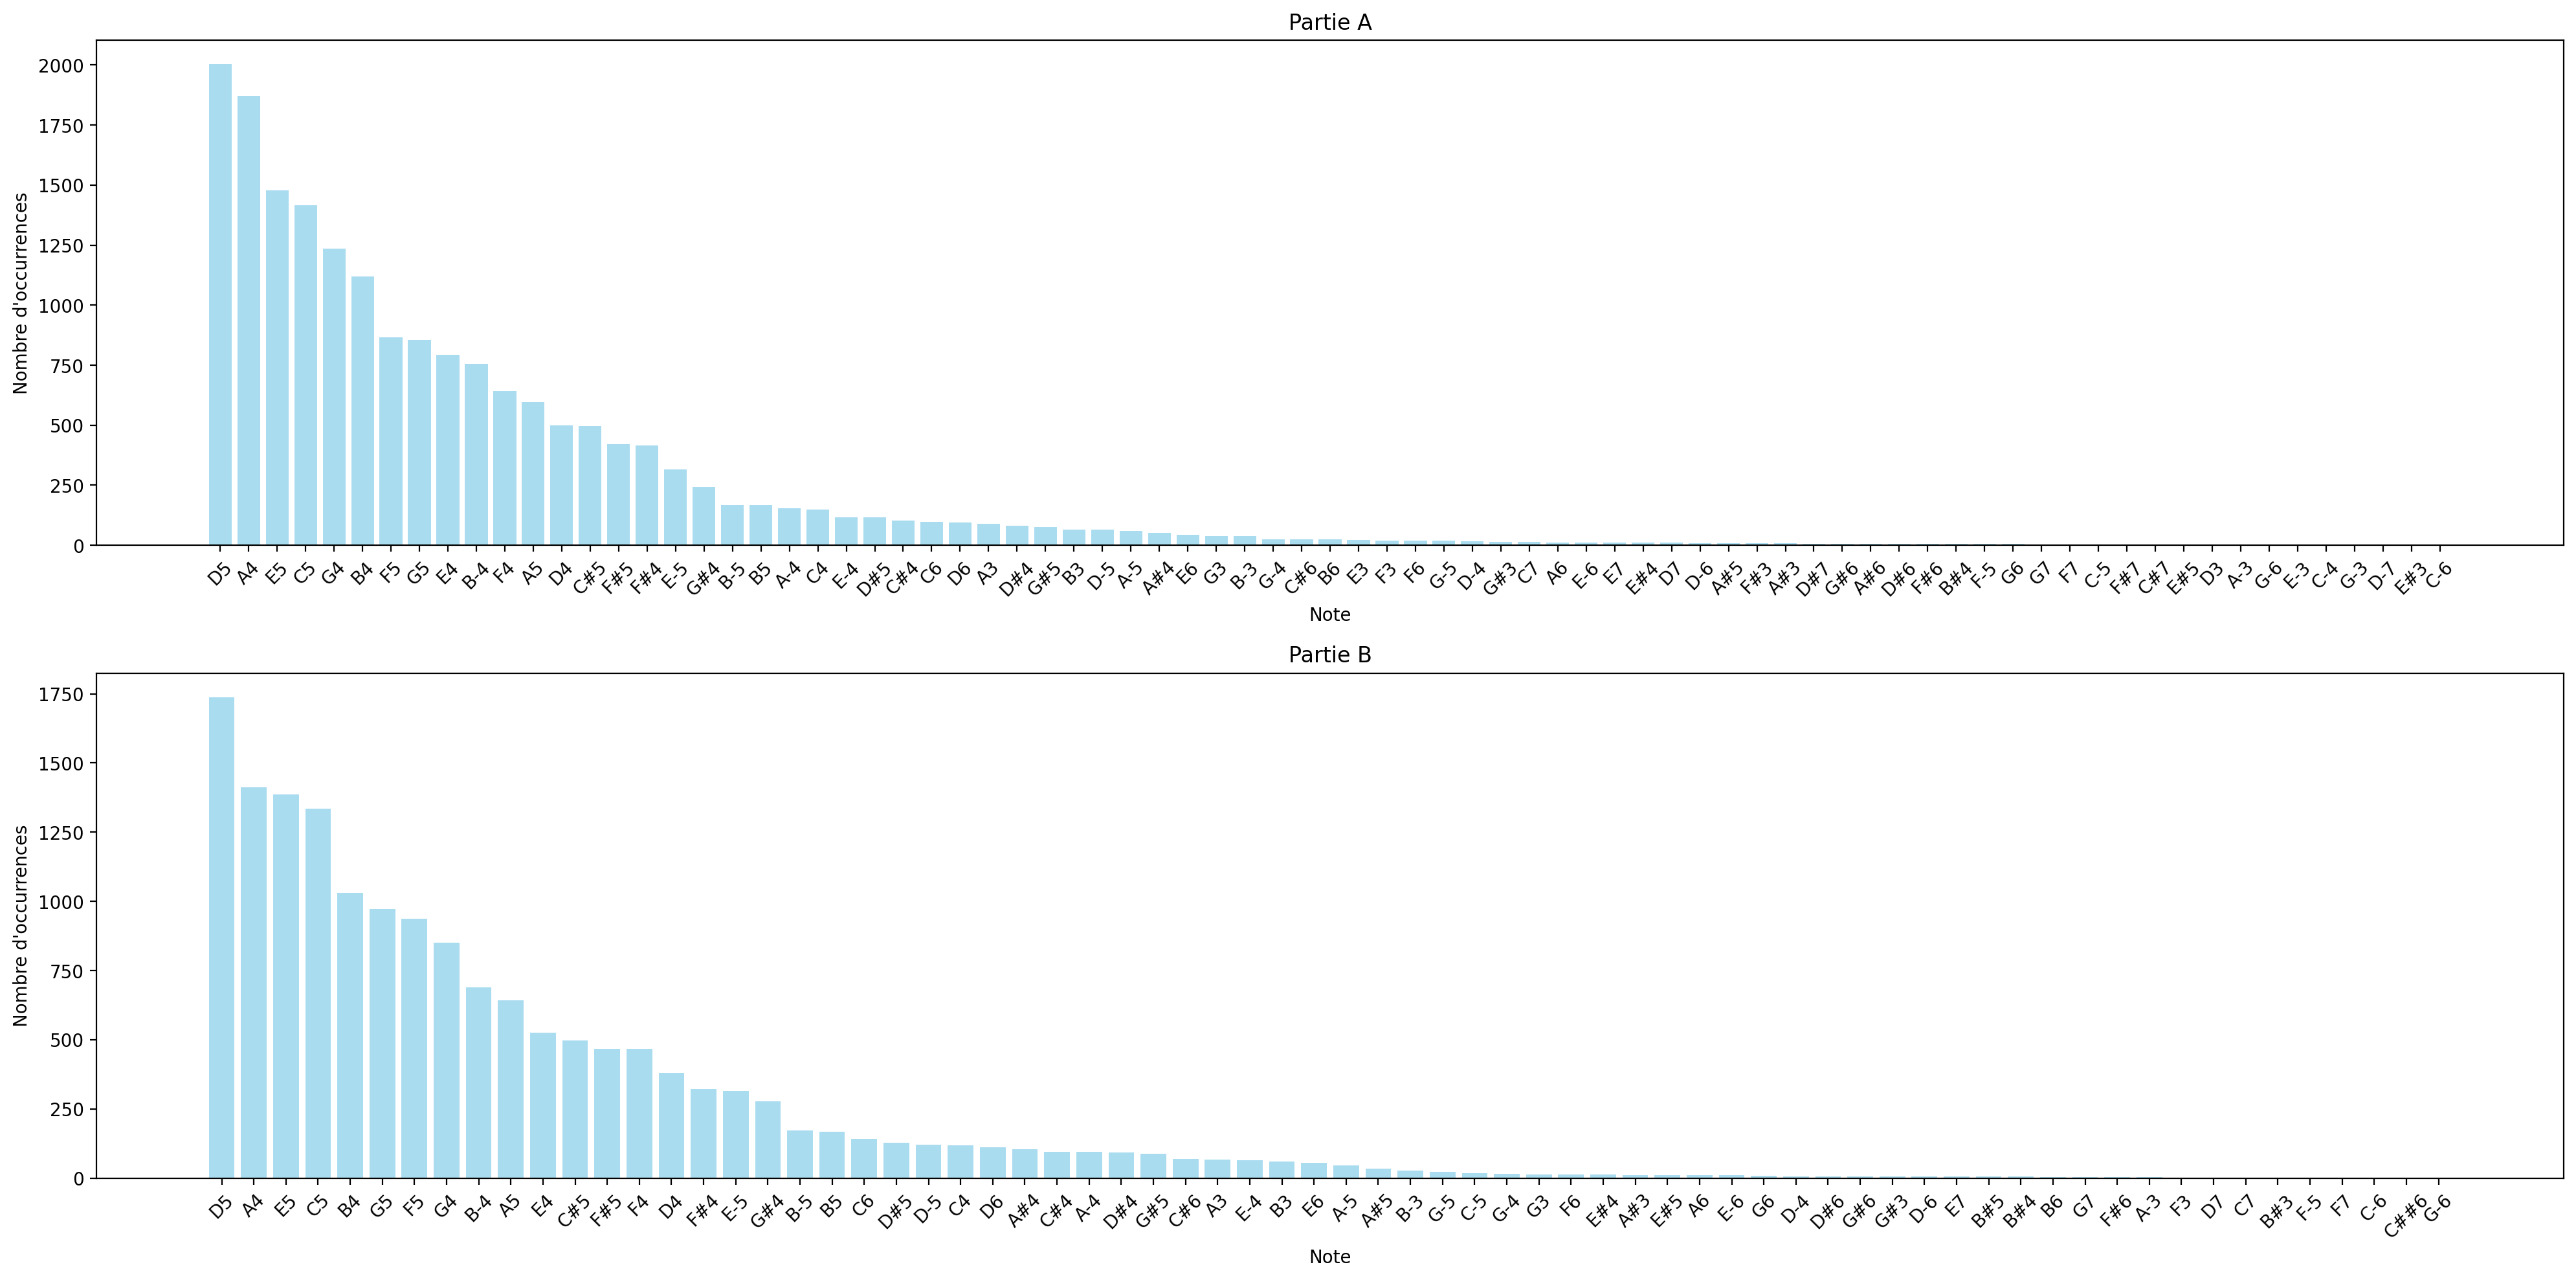

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))

for i, part in enumerate(['A', 'B']):
    cumulative_counts = pd.DataFrame()
    for measure in range(1, 37): # Somme des comptages cumulés de chaque note pour chaque mesure
        cumulative_counts = cumulative_counts.add(cpt_notes[part][measure], fill_value=0)

    total_counts = cumulative_counts.sum()
    total_counts = total_counts.sort_values(ascending=False)
    axs[i].bar(total_counts.index, total_counts.values, alpha=0.7, color='skyblue')

    axs[i].set_title(f'Partie {part}')
    axs[i].set_xlabel('Note')
    axs[i].set_ylabel('Nombre d\'occurrences')
    axs[i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()


In [70]:
# Calcul des pourcentages d'occurrence 
note_percentages_A = note_counts_A_sum / note_counts_A_sum.sum() * 100
note_percentages_B = note_counts_B_sum / note_counts_B_sum.sum() * 100

note_percentages_A = note_percentages_A.sort_values(ascending=False)
note_percentages_B = note_percentages_B.sort_values(ascending=False)

df_A_pn = pd.DataFrame({'Note': note_percentages_A.index, 'Pourcentage d\'occurrence (Partie A)': note_percentages_A.values})
df_B_pn = pd.DataFrame({'Note': note_percentages_B.index, 'Pourcentage d\'occurrence (Partie B)': note_percentages_B.values})

print("Partie A:")
print(df_A_pn)


Partie A:
   Note  Pourcentage d'occurrence (Partie A)
0    A4                            11.970979
1    D5                            10.761790
2    G4                             7.859734
3    E5                             7.738815
4    C5                             7.738815
5    B4                             5.925030
6    F5                             5.562273
7    E4                             5.562273
8    F4                             4.474002
9    G5                             3.748489
10  B-4                             3.143894
11   D4                             2.902056
12   A5                             2.781137
13  F#5                             1.934704
14  F#4                             1.692866
15  B-5                             1.451028
16  C#5                             1.451028
17   C4                             1.451028
18  E-5                             1.330109
19   B5                             1.088271
20   B3                             1.088271


In [71]:
print("\nPartie B:")
print(df_B_pn)


Partie B:
   Note  Pourcentage d'occurrence (Partie B)
0    D5                            10.864745
1    A4                             9.090909
2    C5                             8.536585
3    E5                             7.760532
4    B4                             5.654102
5    F5                             5.432373
6    G5                             5.321508
7    G4                             4.545455
8    F4                             3.880266
9    E4                             3.880266
10  B-4                             3.658537
11   A5                             3.547672
12  F#5                             3.325942
13   D4                             3.325942
14  C#5                             2.771619
15  F#4                             1.995565
16  G#4                             1.995565
17  D#4                             1.219512
18   C6                             1.108647
19   B5                             1.108647
20  A#4                             0.997783

## Accords

### Sur une mesure en particulier 

In [74]:
def count_accords(accord_list):
    return dict(Counter(accord[0] for accord in accord_list))

df['Accords_Count_A'] = df['A.1.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})
df['Accords_Count_B'] = df['B.1.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})

accord_counts_A = pd.DataFrame(df['Accords_Count_A'].tolist()).fillna(0)
accord_counts_B = pd.DataFrame(df['Accords_Count_B'].tolist()).fillna(0)

accord_counts_A_sum = accord_counts_A.sum()
accord_counts_B_sum = accord_counts_B.sum()

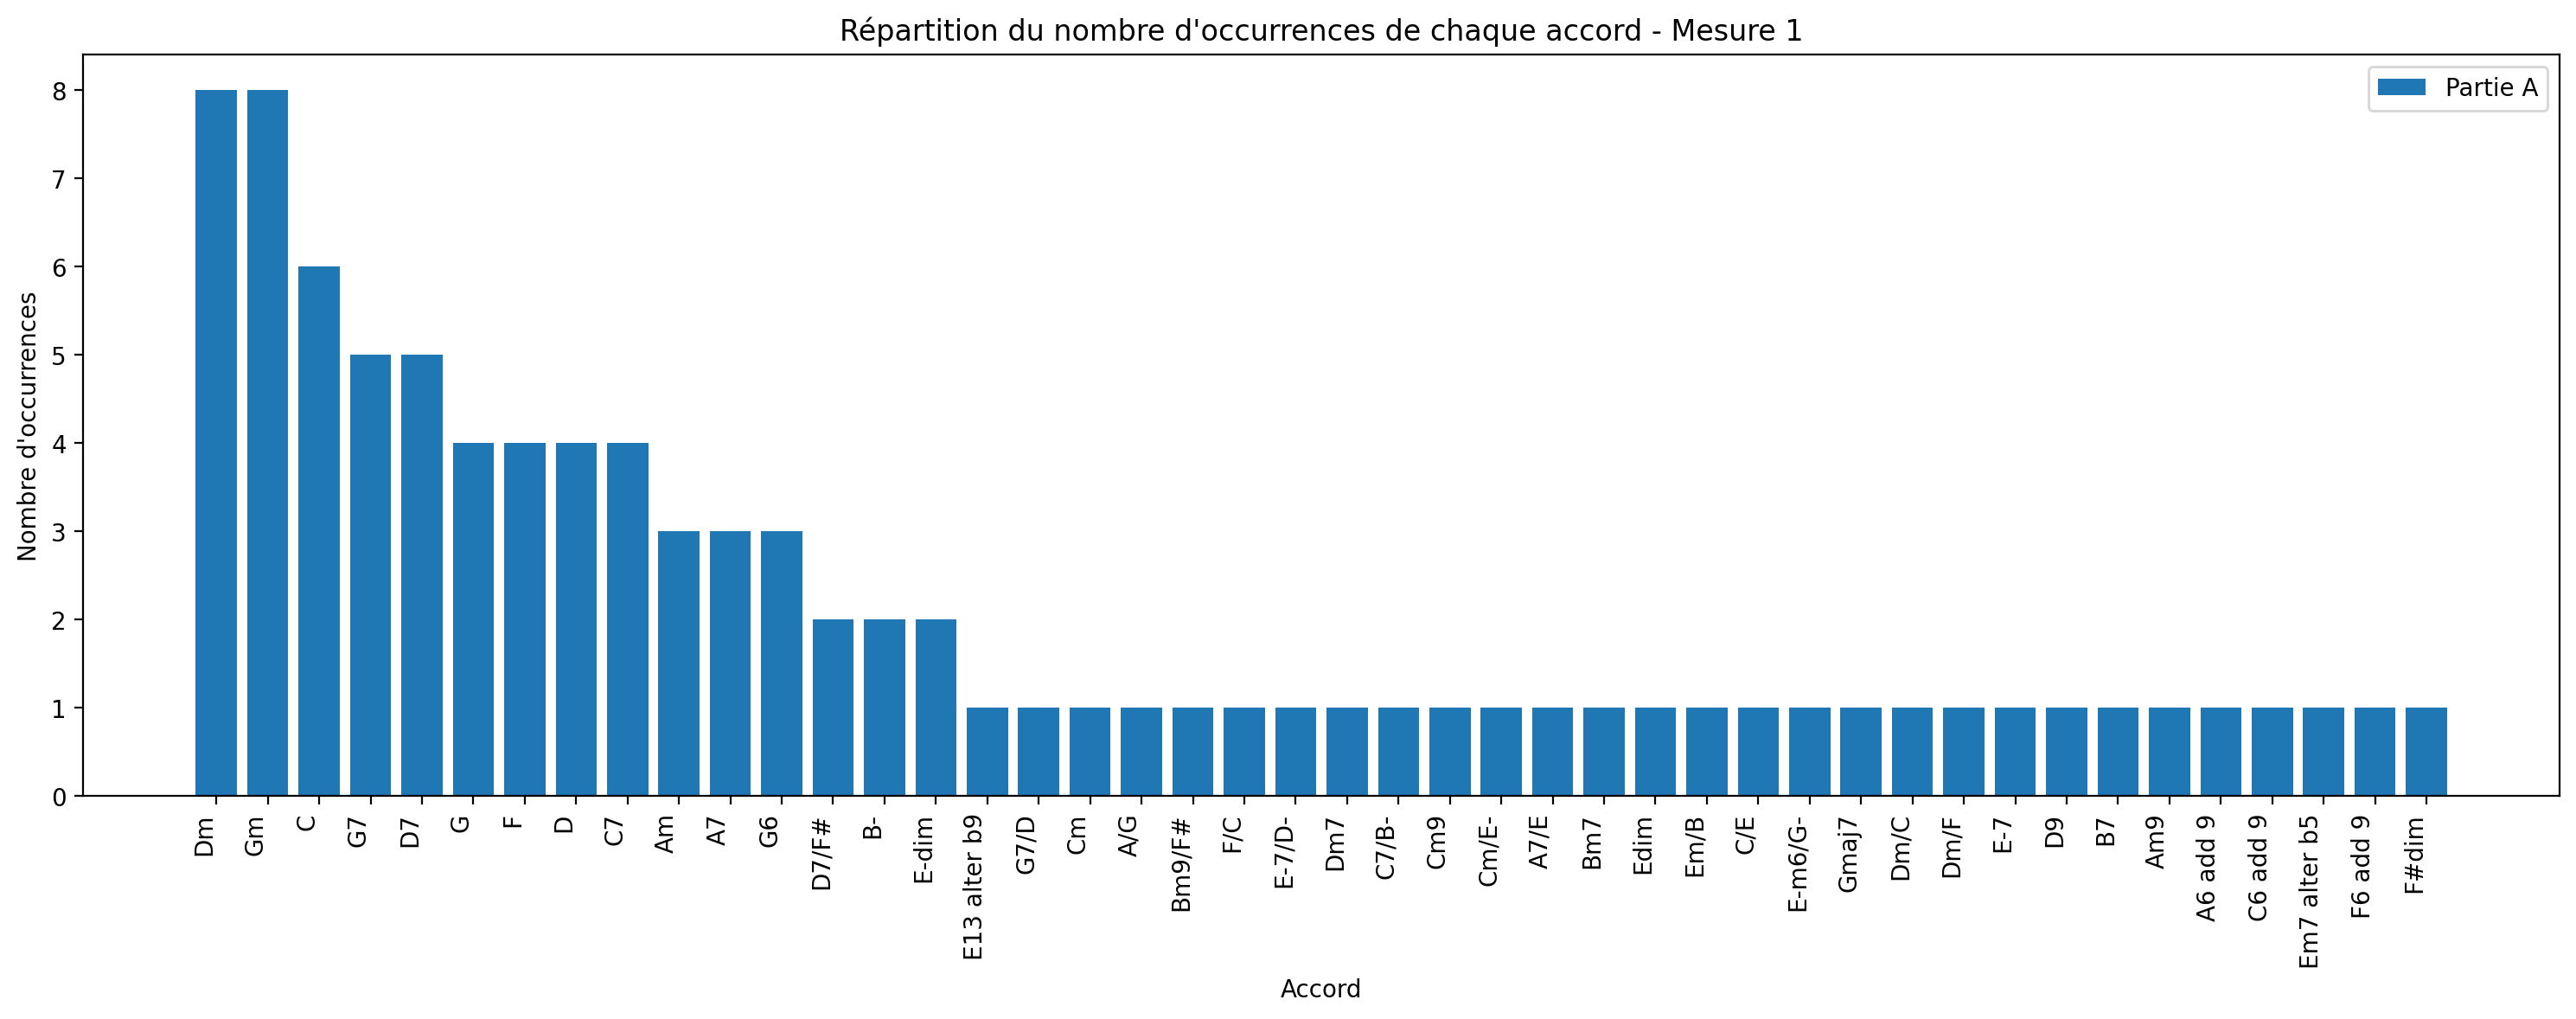

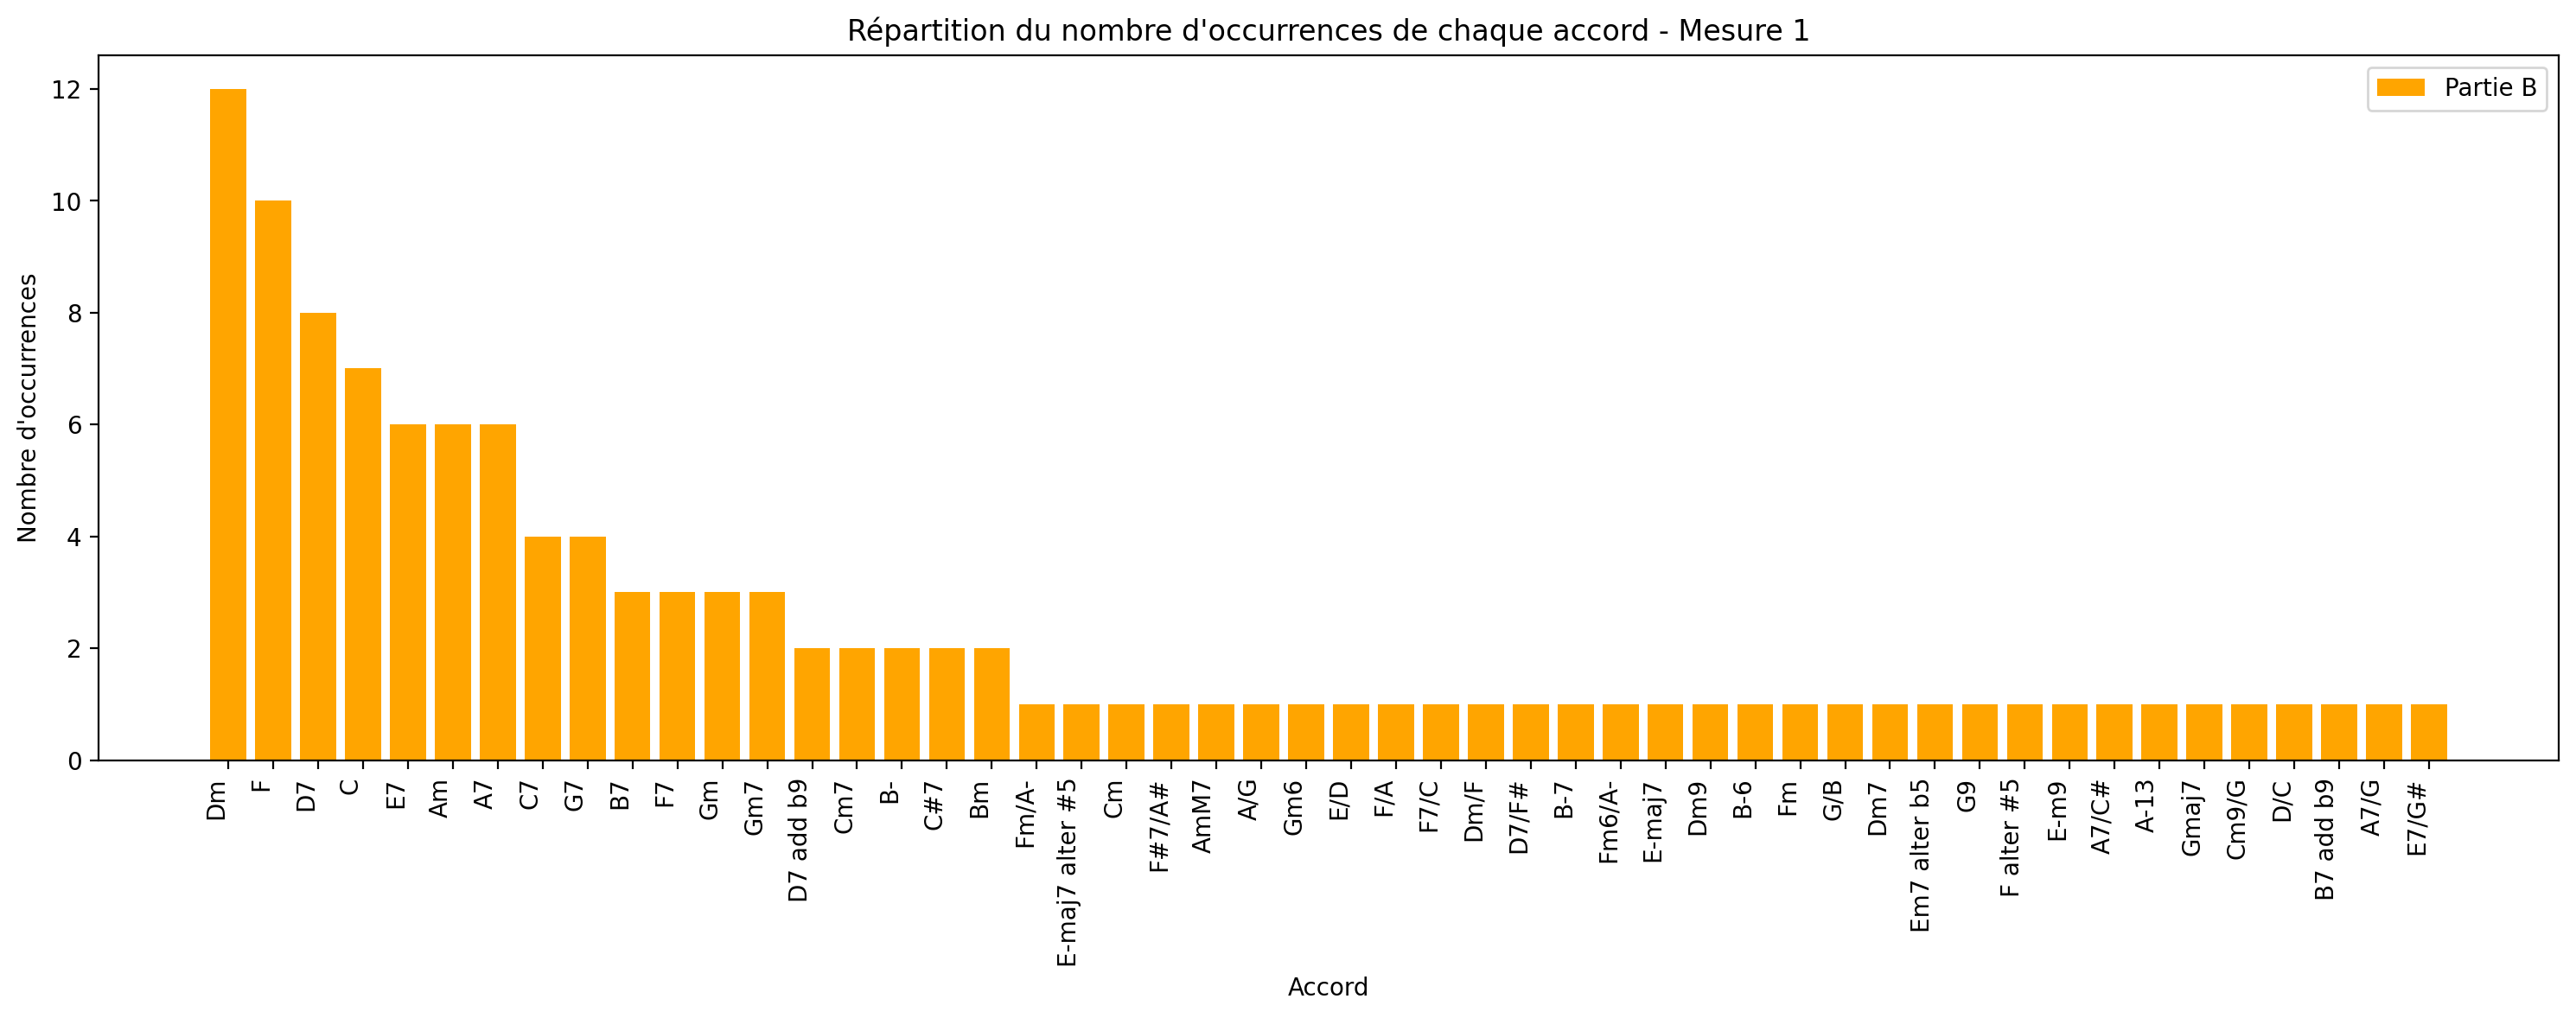

In [75]:
accord_counts_A_sum = accord_counts_A_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(accord_counts_A_sum.index, accord_counts_A_sum.values, label='Partie A')
plt.xlabel('Accord')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Mesure 1')
plt.xticks(rotation=90, ha='right')  
plt.legend()
plt.tight_layout()
plt.show()

accord_counts_B_sum = accord_counts_B_sum.sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(accord_counts_B_sum.index, accord_counts_B_sum.values, label='Partie B', color='orange')
plt.xlabel('Accord')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Mesure 1')
plt.xticks(rotation=90, ha='right') 
plt.legend()
plt.tight_layout()
plt.show()


### Sur une partie en particulier 

In [46]:
for part in ['A', 'B']:
    for measure in range(1, 37):  #Prend en compte 36 mesures max par partie
        df[f'Accords_Count_{part}_{measure}'] = df[f'{part}.{measure}.Accords'].apply(lambda x: count_accords(x) if isinstance(x, list) else {})

accord_counts = {}
for part in ['A', 'B']:
    accord_counts[part] = {}
    for measure in range(1, 37):
        accord_counts[part][measure] = pd.DataFrame(df[f'Accords_Count_{part}_{measure}'].tolist()).fillna(0)

accord_counts_sum = {}
for part in ['A', 'B']:
    accord_counts_sum[part] = {}
    for measure in range(1, 37):
        accord_counts_sum[part][measure] = accord_counts[part][measure].sum()


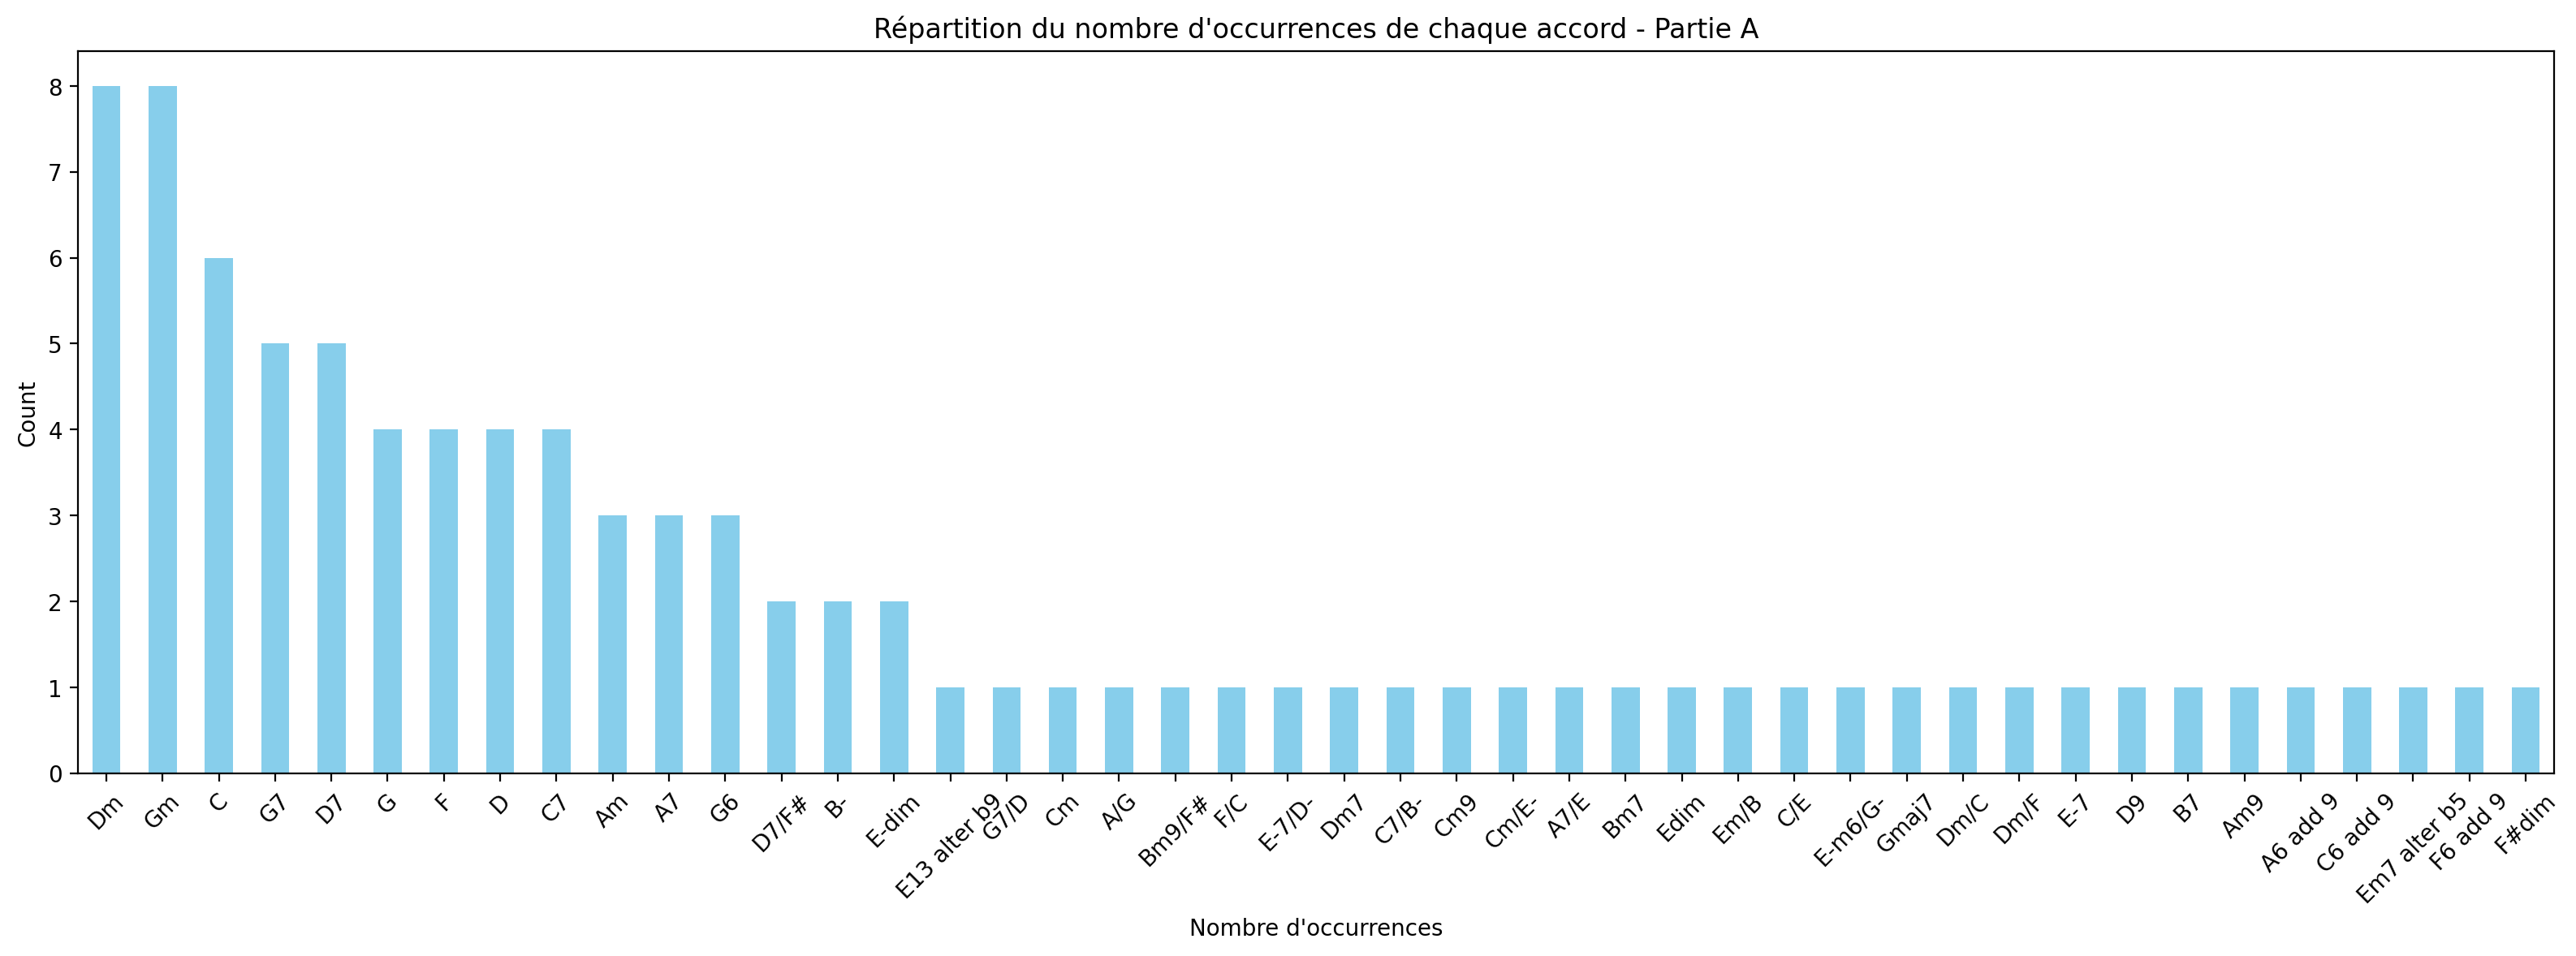

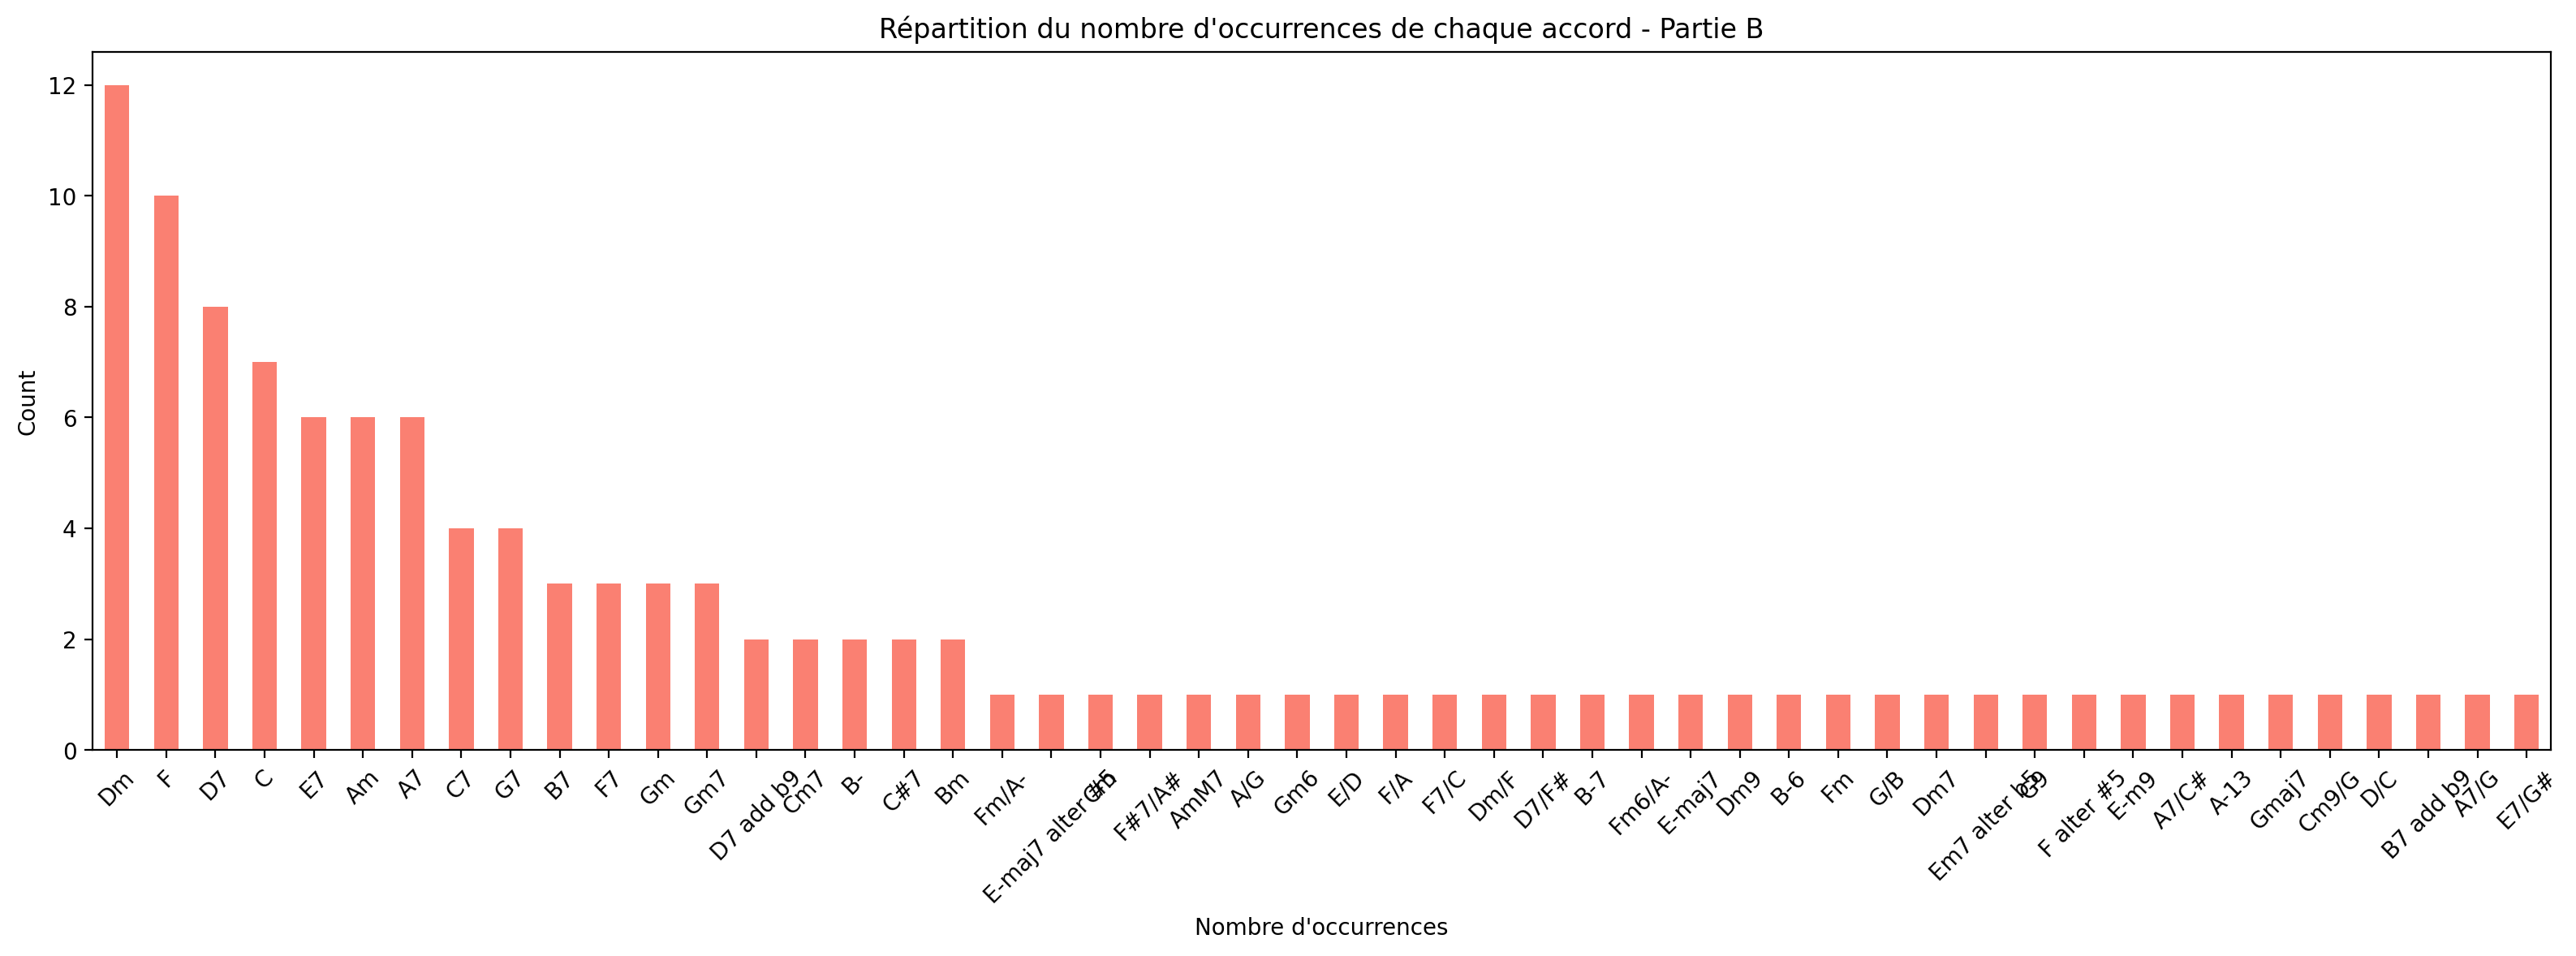

In [47]:
accord_counts_A_global = accord_counts_A.sum(axis=0)
accord_counts_B_global = accord_counts_B.sum(axis=0)

accord_counts_A_global = accord_counts_A_global.sort_values(ascending=False)
accord_counts_B_global = accord_counts_B_global.sort_values(ascending=False)


plt.figure(figsize=(16, 6))
accord_counts_A_global.plot(kind='bar', color='skyblue')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Partie A')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
accord_counts_B_global.plot(kind='bar', color='salmon')
plt.title('Répartition du nombre d\'occurrences de chaque accord - Partie B')
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
# Calcul du total d'accords pour chaque partie
total_accords_A = accord_counts_A_global.sum()
total_accords_B = accord_counts_B_global.sum()

print("total d'accords pour A:", total_accords_A)
print("total d'accords pour B:", total_accords_B)


total d'accords pour A: 92.0
total d'accords pour B: 117.0
